<h1>Introduction</h1><hr>
<h6>Ce projet vise à :</h6>

- étudier quelles fonctionnalités ont eu, au fil du temps, un impact positif sur la croissance et le succès des startups et dans quelle mesure elles l'ont déterminé.

- prédire le succès/l'échec de la startup sur la base de ses données actuelles.
<hr>
L'étude se décompose en les étapes suivantes :

**Pré-traitement, analyse et transformation des données:** 
- Visant à supprimer les valeurs manquantes et à recombiner les données dans des tables plus informatives.
- Nous aurons aussi une vue générale des données et des relations entre les variables.
- Des nouvelles colonnes seront crée en transformant des anciennes colonnes, visant à obtenir un jeu de données unique sur lequel les modèles seront construits.

**Modélisation des données:** dans laquelle sont utilisés regrission multiple, knn,  arbre de décision et forét aléatoire pour prédire la variable dépendante.

# Pré-traitement de données

- Le travail de pré-traitement sera fait avec python, plus précisement avec les librairies pandas, numpy, matplotlib et seaborn.

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set(style='darkgrid', context='talk', font_scale=3)

In [2]:
df=pd.read_csv(r'C:\Users\lenovo\Desktop\Polytech\Data Mining\Projet\Data\objects.csv', low_memory=False)

In [3]:
df.isnull().sum()

id                          0
entity_type                 0
entity_id                   0
parent_id              434936
name                        2
normalized_name            31
permalink                   0
category_code          339465
status                      0
founded_at             362210
closed_at              459842
domain                 287709
homepage_url           287709
twitter_username       336562
logo_url               253801
logo_width                  0
logo_height                 0
short_description      455034
description            367646
overview               227416
tag_list               356155
country_code           367608
state_code             407891
city                   371967
region                      0
first_investment_at    445695
last_investment_at     445695
investment_rounds           0
invested_companies          0
first_funding_at       431144
last_funding_at        431144
funding_rounds              0
funding_total_usd           0
first_mile

***Comme il est indiqué, la table comporte 40 colonnes dont la plupart ont une majorité de données perdues et certaines colonnes n'ayant aucune importance dans le process d'ECD. Cela implique une nécessité de séléction de certaines colonnes dans la table, les colonnes concernées seront ***<h6 style="color:green"><br>
- category_code 
- country_code 
- state_code 
- funding_rounds 
- funding_total_usd 
- milestones 
- relationships</br></h6>

In [4]:
df = df[['category_code', 'status','country_code', 'state_code', 'investment_rounds', 'invested_companies', 'funding_rounds', 'funding_total_usd', 'milestones', 'relationships']]
df.dropna(inplace=True)

<AxesSubplot:>

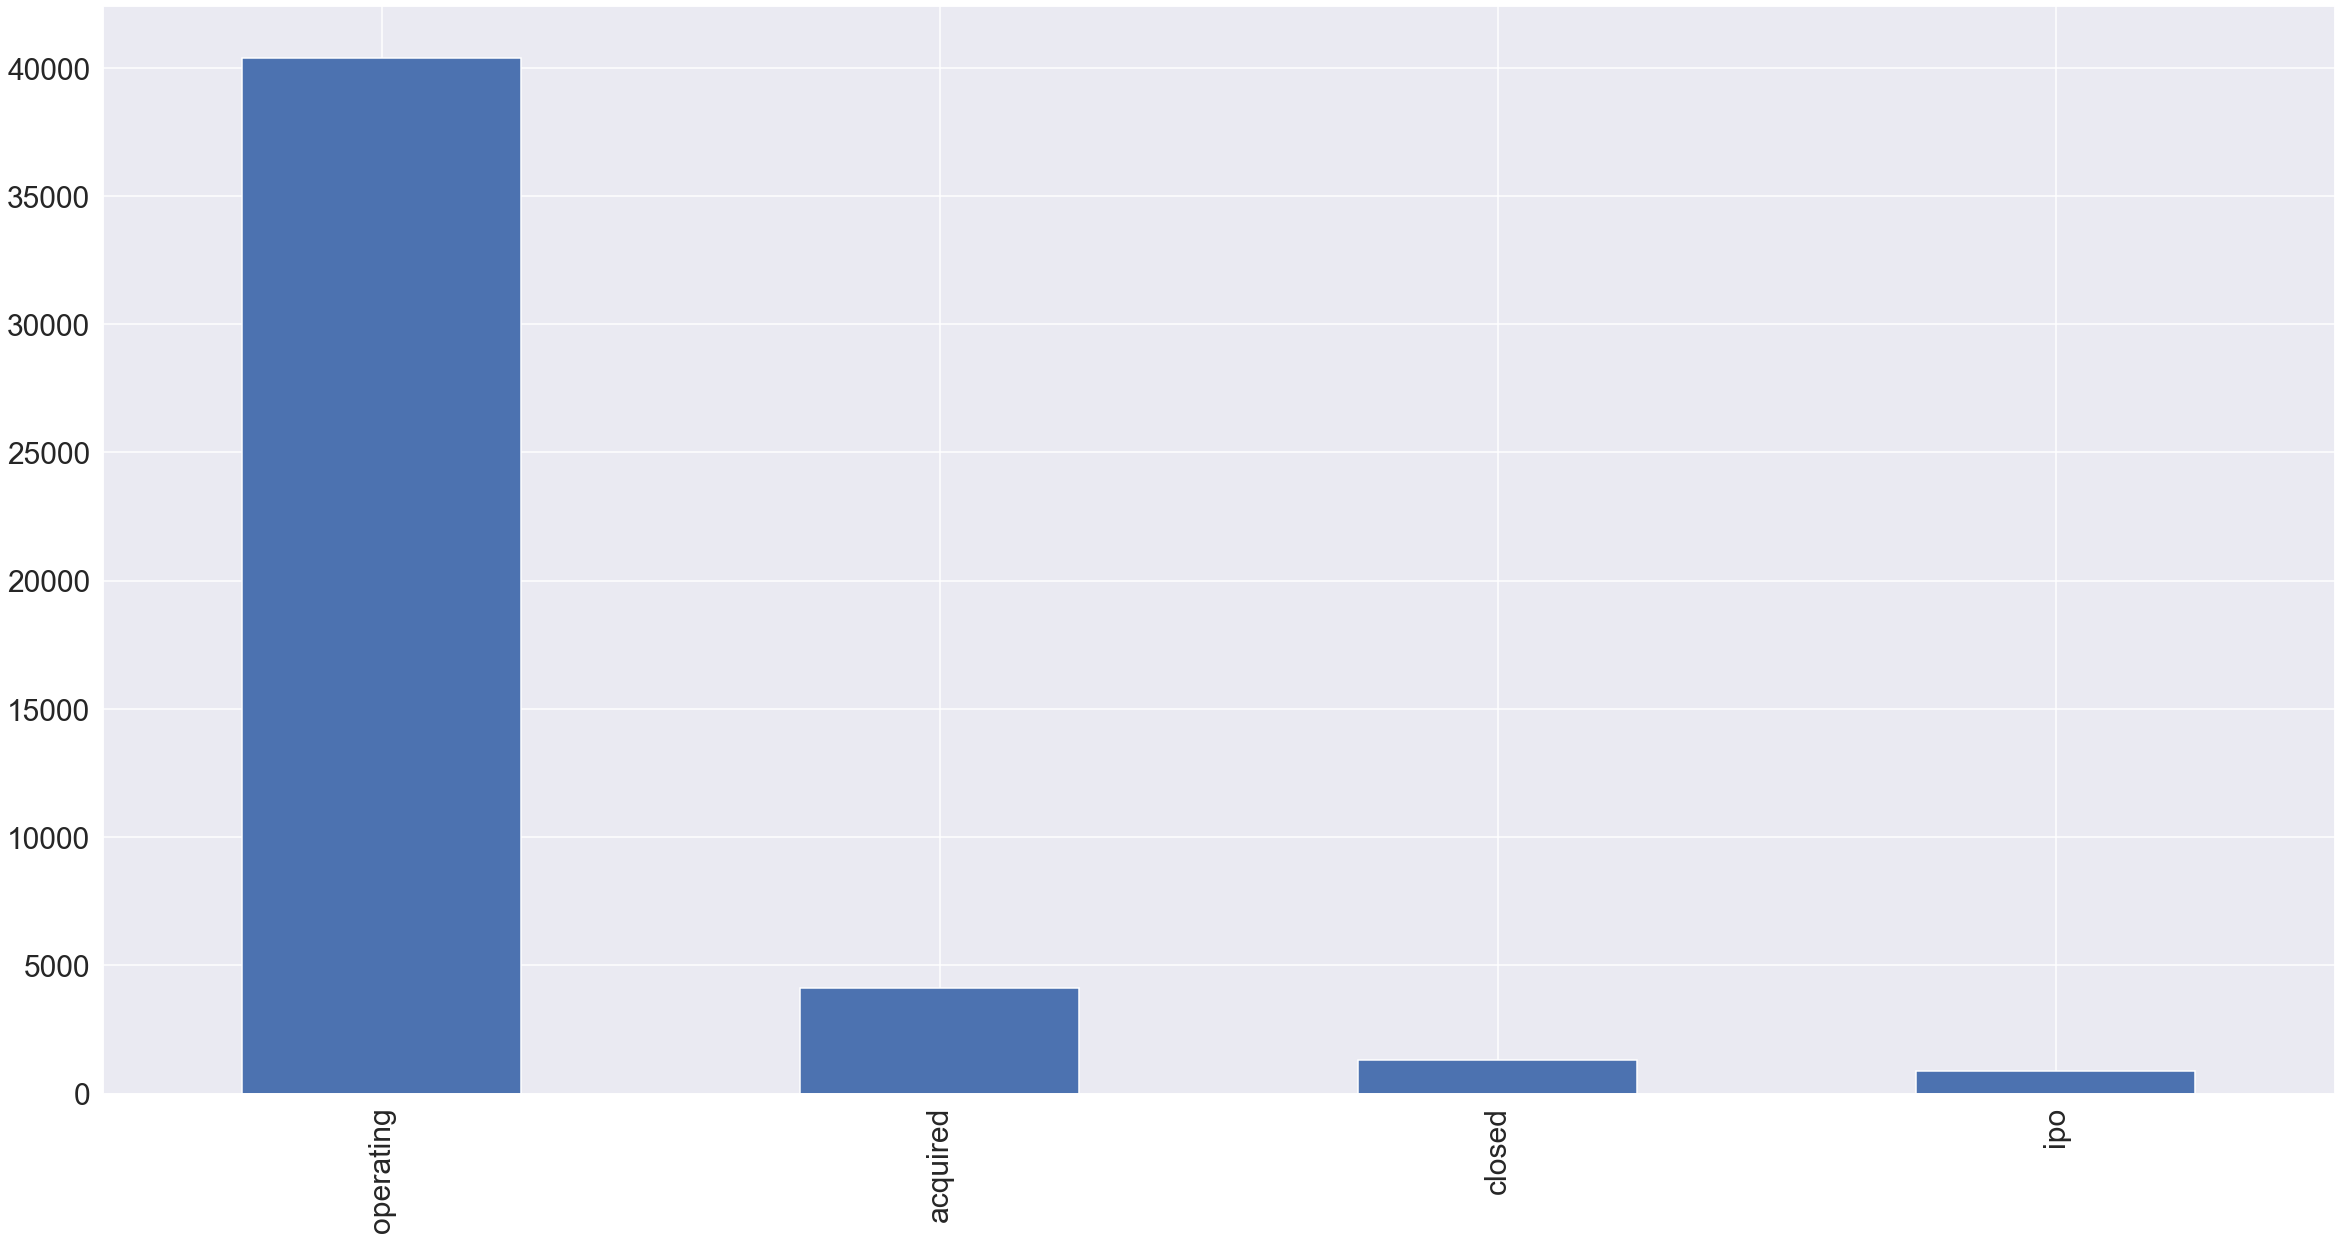

In [5]:
df['status'].value_counts().plot(kind='bar', figsize=(40,20), fontsize=30)

***Comme l'objet de ce projet est de prédire à partir des données d'une startup opérationnelle est ce qu'elle va échouer ou pas, on va supprimer toute les lignes contenant des startup opérationnelle et aussi transformer les lignes en valeurs numériques.***

<AxesSubplot:>

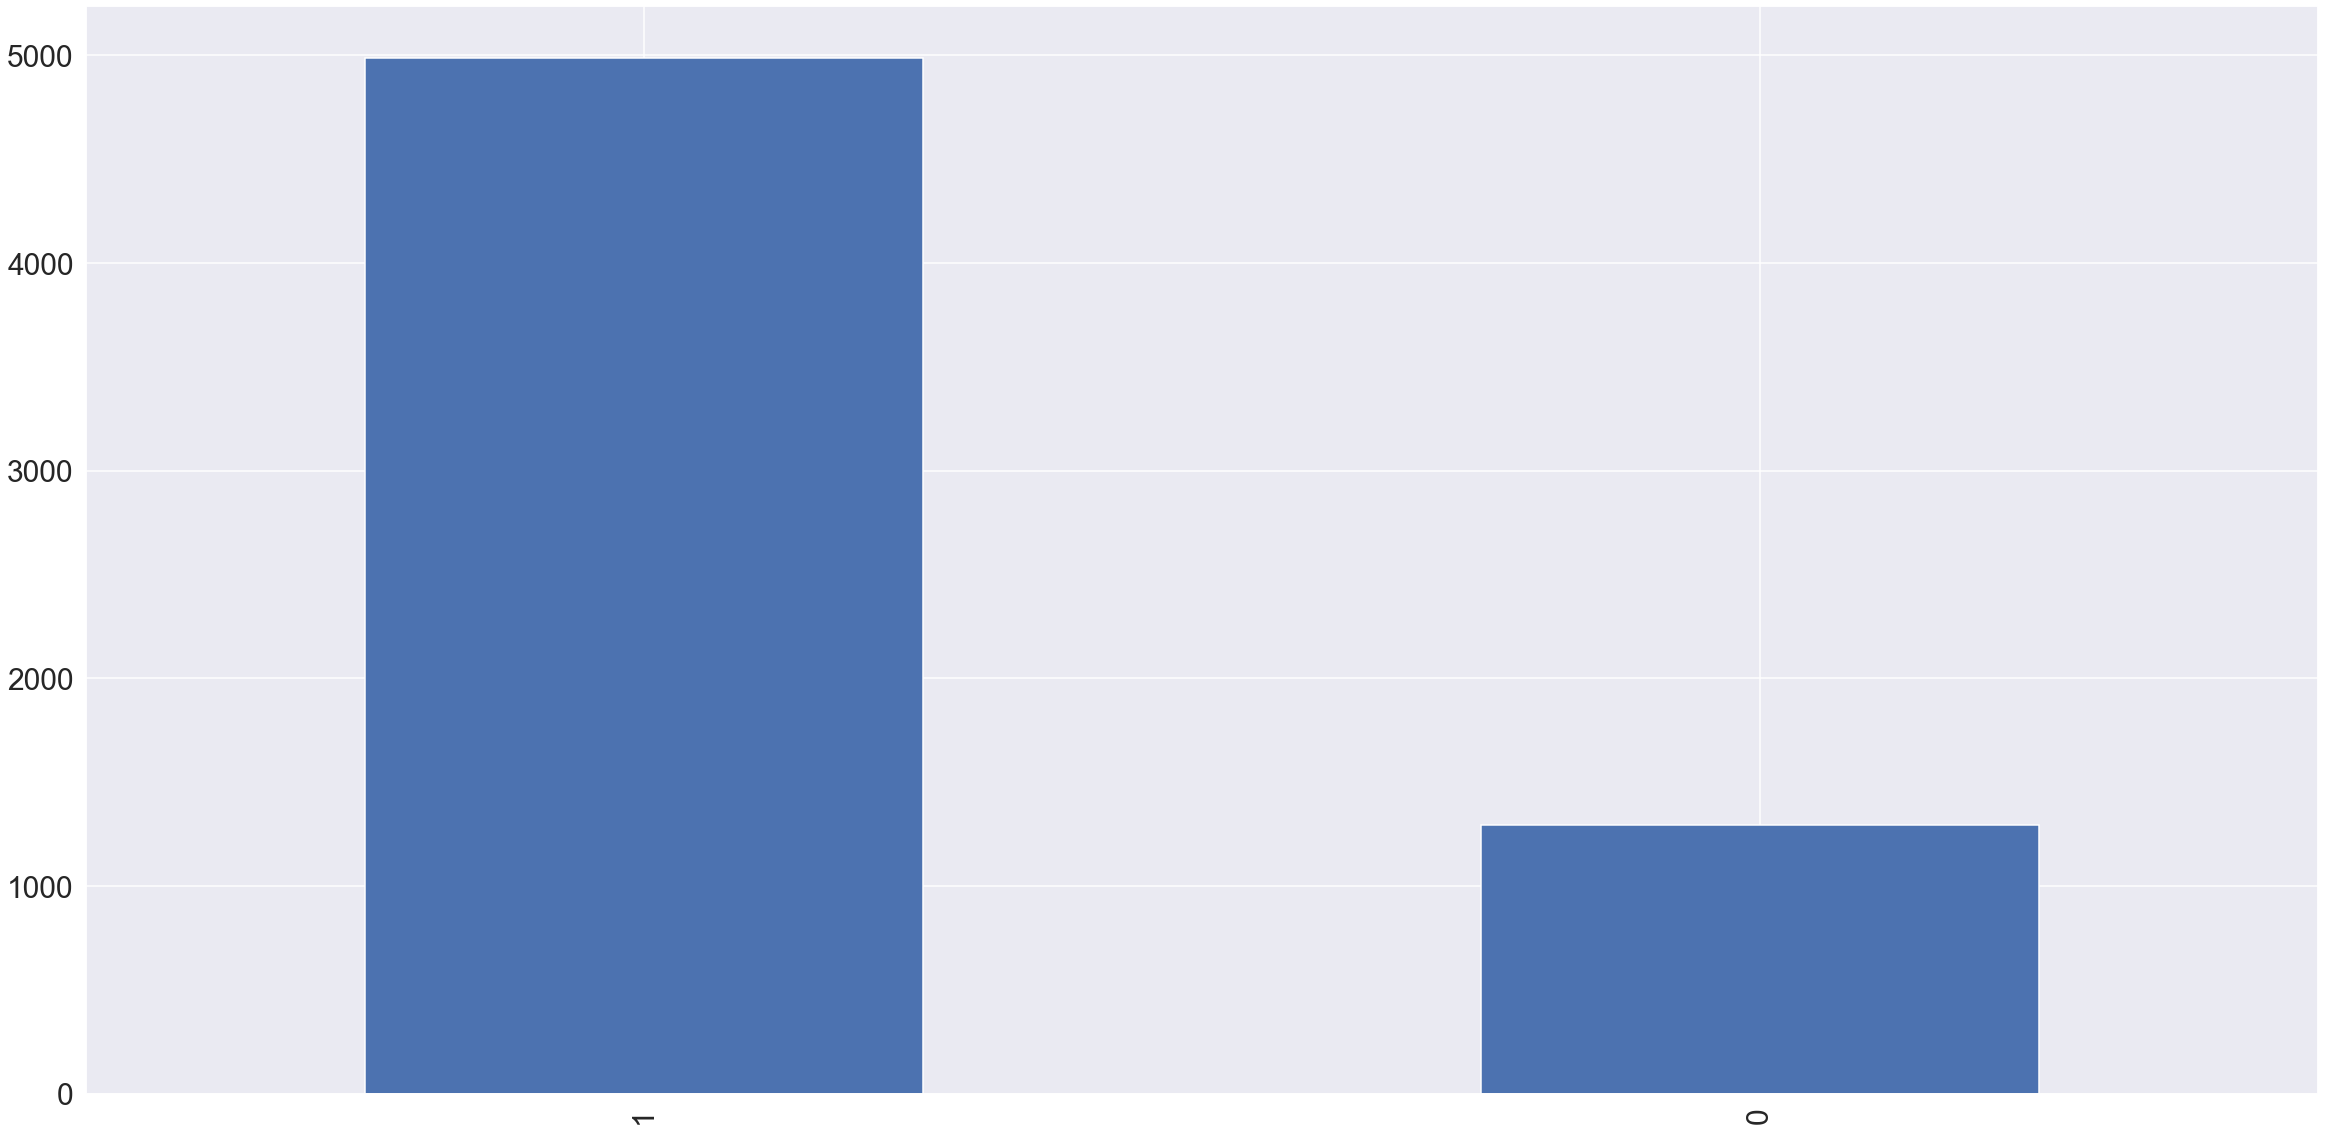

In [6]:
df['status'].replace({'operating':-1, 'closed':0, 'acquired':1, 'ipo':1}, inplace=True)
df.drop(df.loc[df['status']==-1].index, inplace=True)
df['status'].value_counts().plot(kind='bar', figsize=(40,20), fontsize=30)

<h3>La variable cible est status, ces deux classes sont réussite:1 échec:0</h3>

<AxesSubplot:xlabel='category_code'>

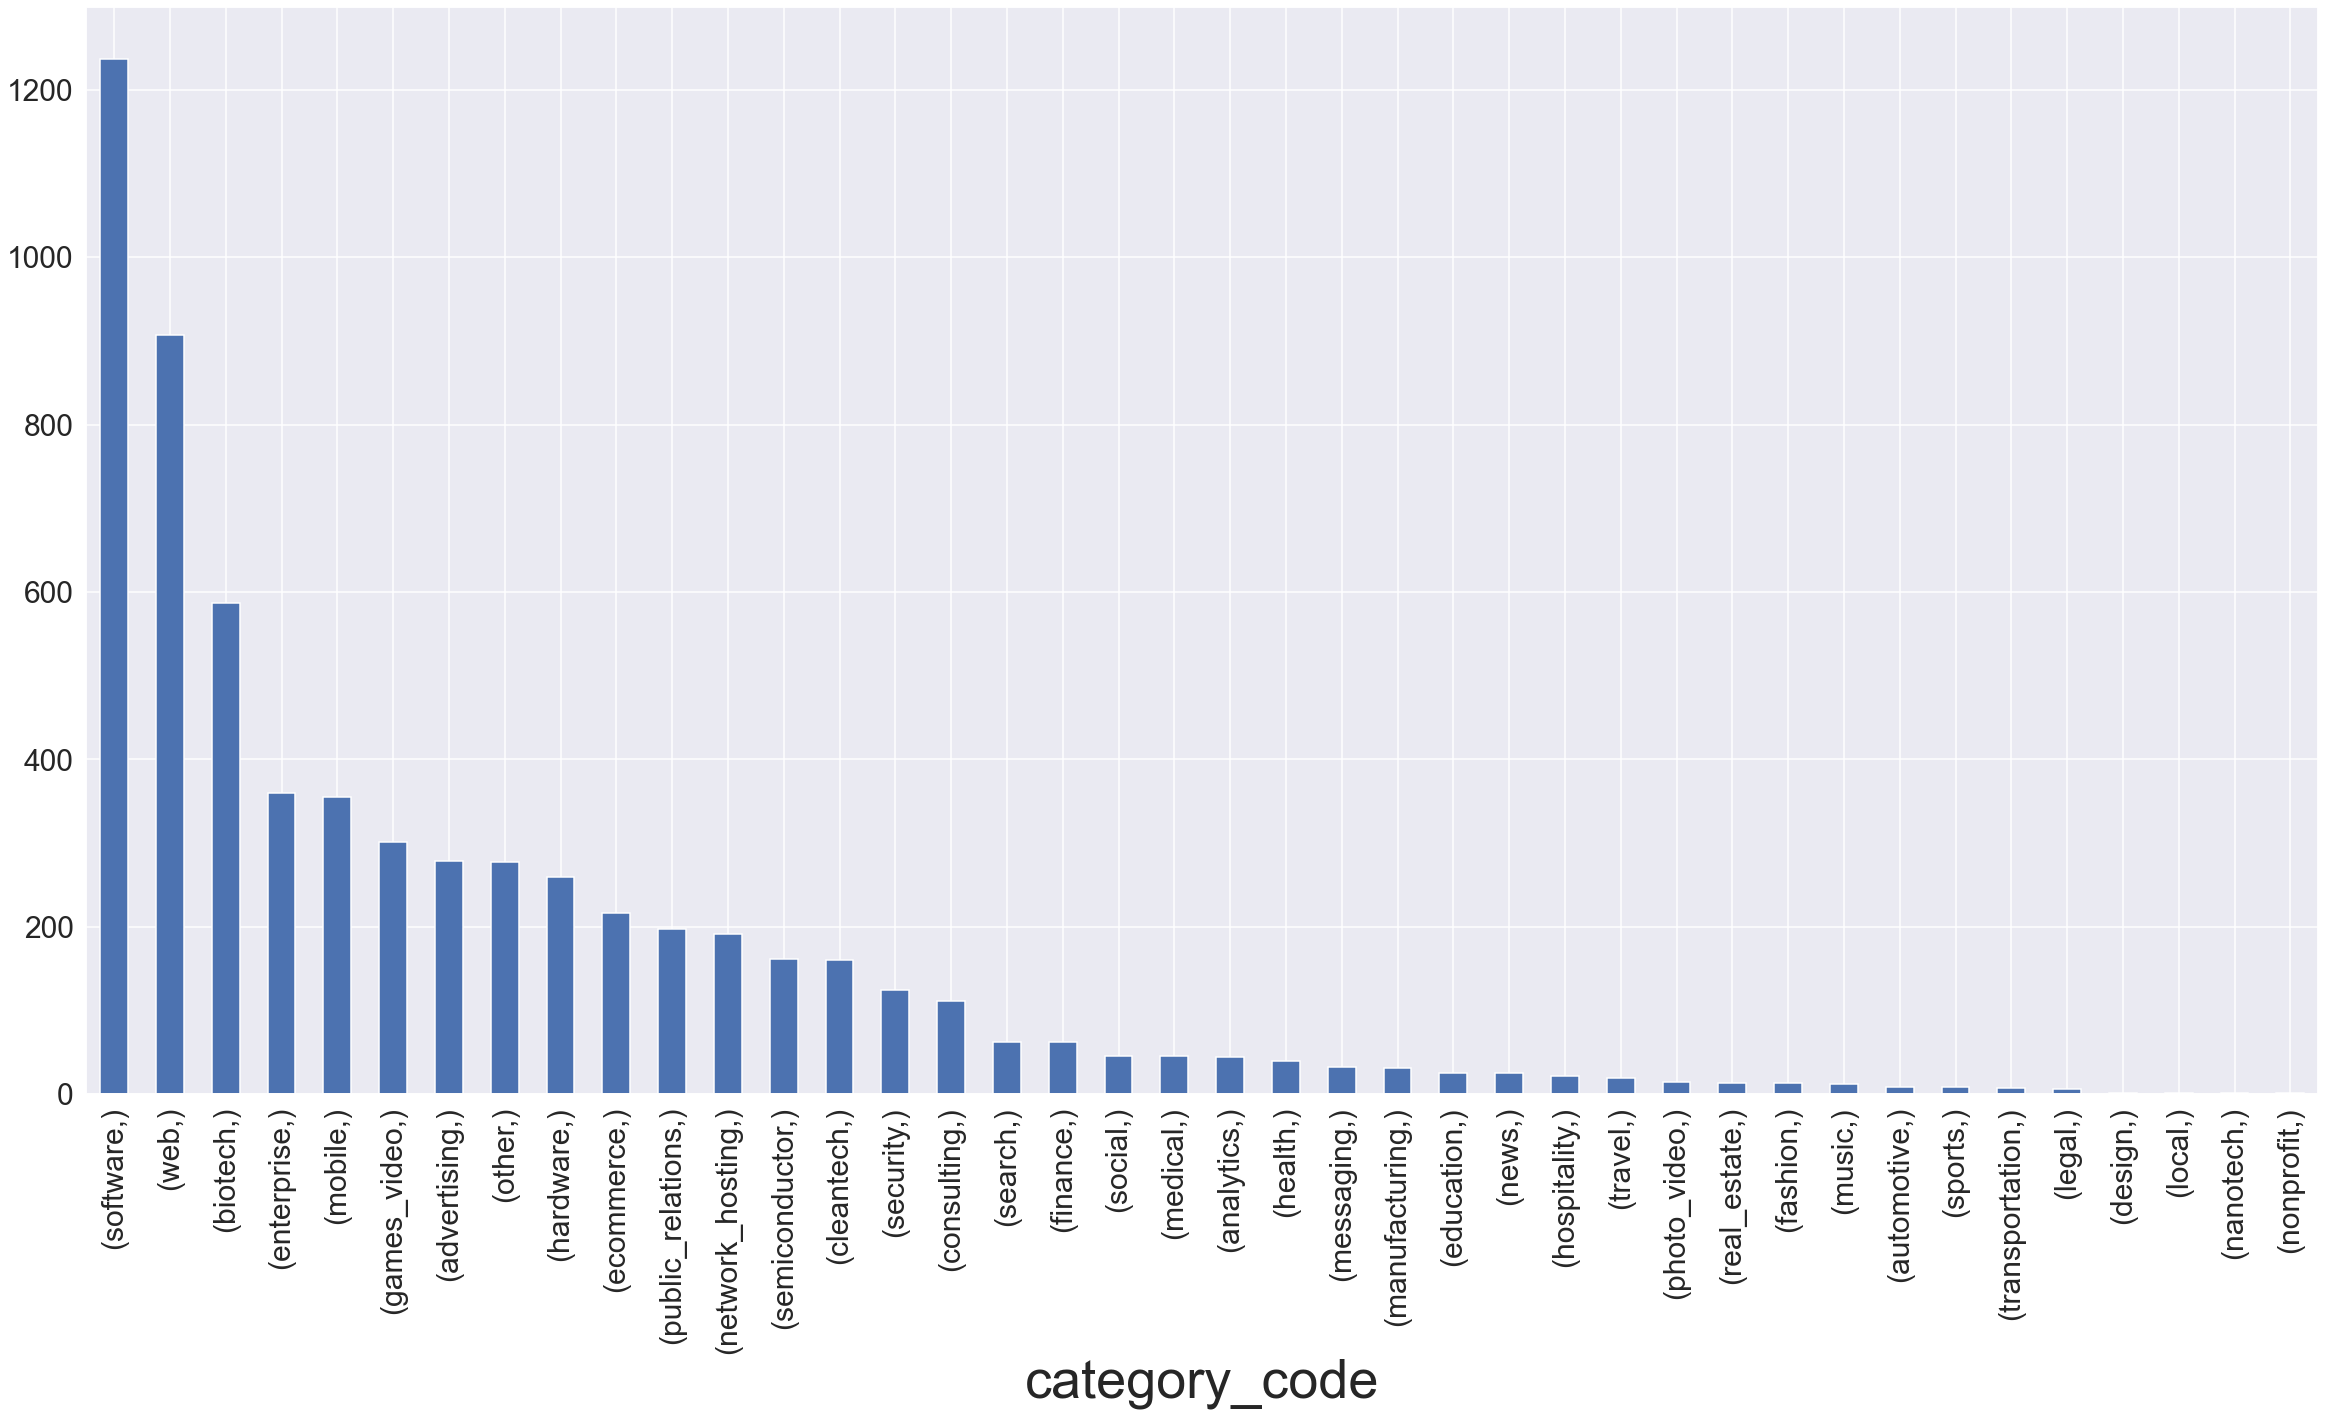

In [7]:
import matplotlib.pyplot as plot
df['category_code'].dropna(inplace=True)
categ = df[['category_code']]
categ.value_counts().plot(kind='bar', figsize=(40,20), fontsize=30)

***category_code***
- il y a beaucoup de classes (41) ce qui est peut etre un peu trop pour expliquer une variable à deux classes.
- L'hypothèse <strong><span style="color:green">H1</span></strong> est que la corrélation entre category_code et status va augmenter si on applique la transformation par logarithme sur les valeurs numérisées de category_code.***status***.

In [8]:
categ_dic = {x.split(" ")[0]:i for i,x in enumerate(str(df['category_code'].value_counts()).split("\n"))}
categ_dic

{'software': 0,
 'web': 1,
 'biotech': 2,
 'enterprise': 3,
 'mobile': 4,
 'games_video': 5,
 'advertising': 6,
 'other': 7,
 'hardware': 8,
 'ecommerce': 9,
 'public_relations': 10,
 'network_hosting': 11,
 'semiconductor': 12,
 'cleantech': 13,
 'security': 14,
 'consulting': 15,
 'search': 16,
 'finance': 17,
 'medical': 18,
 'social': 19,
 'analytics': 20,
 'health': 21,
 'messaging': 22,
 'manufacturing': 23,
 'education': 24,
 'news': 25,
 'hospitality': 26,
 'travel': 27,
 'photo_video': 28,
 'real_estate': 29,
 'fashion': 30,
 'music': 31,
 'automotive': 32,
 'sports': 33,
 'transportation': 34,
 'legal': 35,
 'nanotech': 36,
 'local': 37,
 'design': 38,
 'nonprofit': 39,
 'Name:': 40}

<AxesSubplot:>

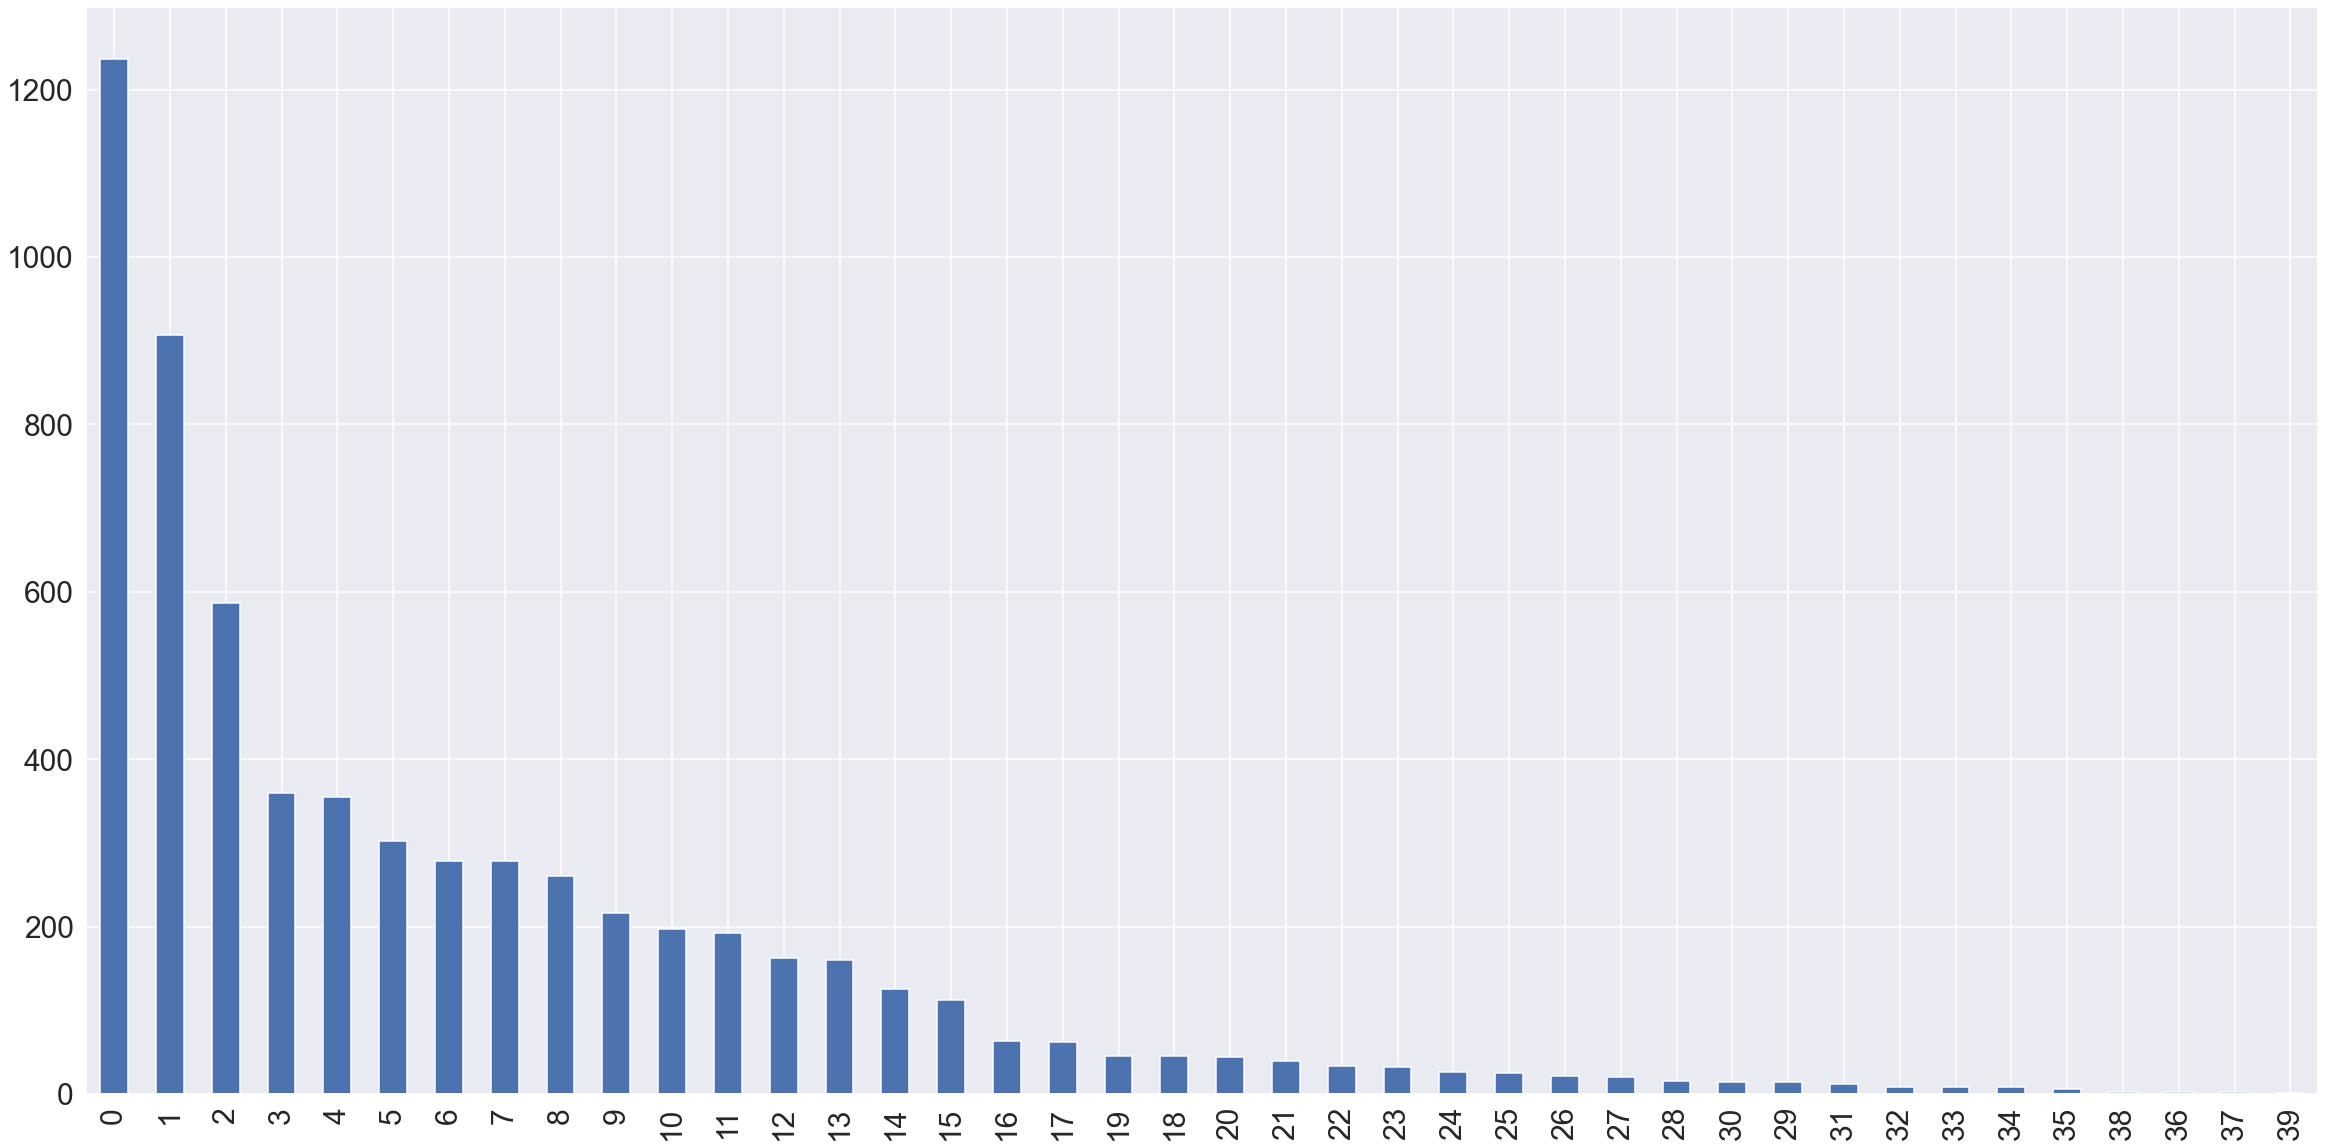

In [9]:
df['category_code'].dropna(inplace=True)
df['category_code'].replace(categ_dic, inplace=True)
df['category_code'].value_counts().plot(kind='bar', figsize=(40,20), fontsize=30)

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

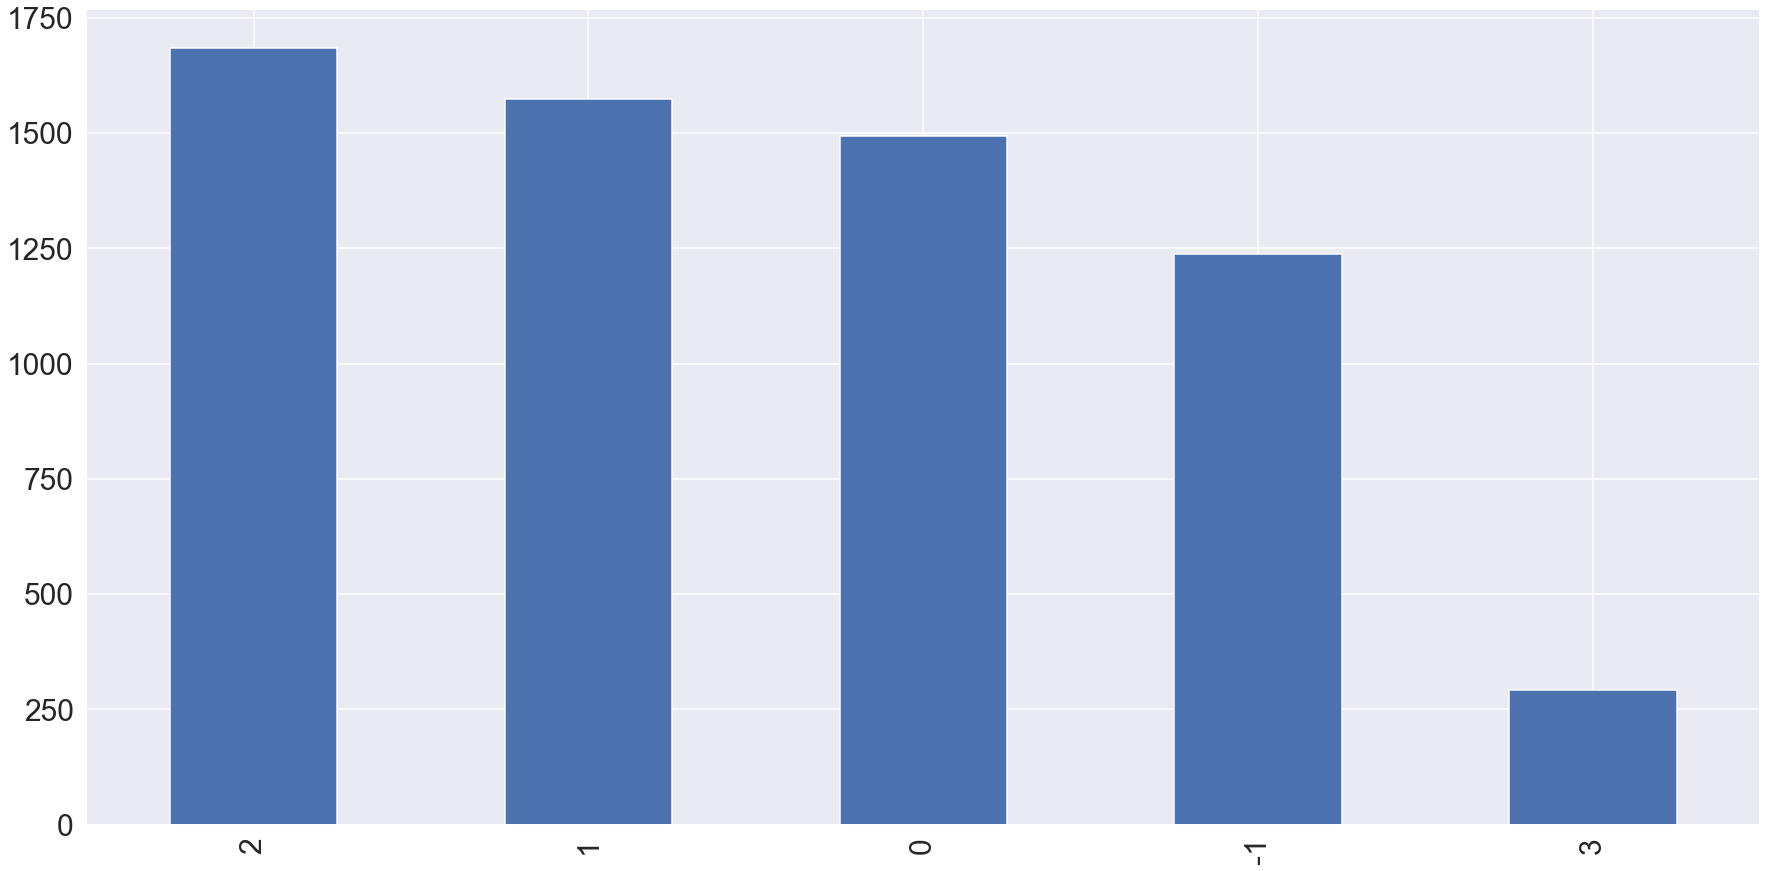

In [10]:
import numpy as np

df['categ_log'] = np.log(df['category_code'])
df['categ_log'].replace({-float('inf'):-1}, inplace=True)
df["categ_log"] = df["categ_log"].apply(np.int64)
df['categ_log'].value_counts().plot(kind='bar', figsize=(30,15), fontsize=30)

In [11]:
df["status"].corr(df['category_code'])>df["status"].corr(df['categ_log'])

True

<strong><span style="color:green">H1</span></strong> est rejetée.

<AxesSubplot:>

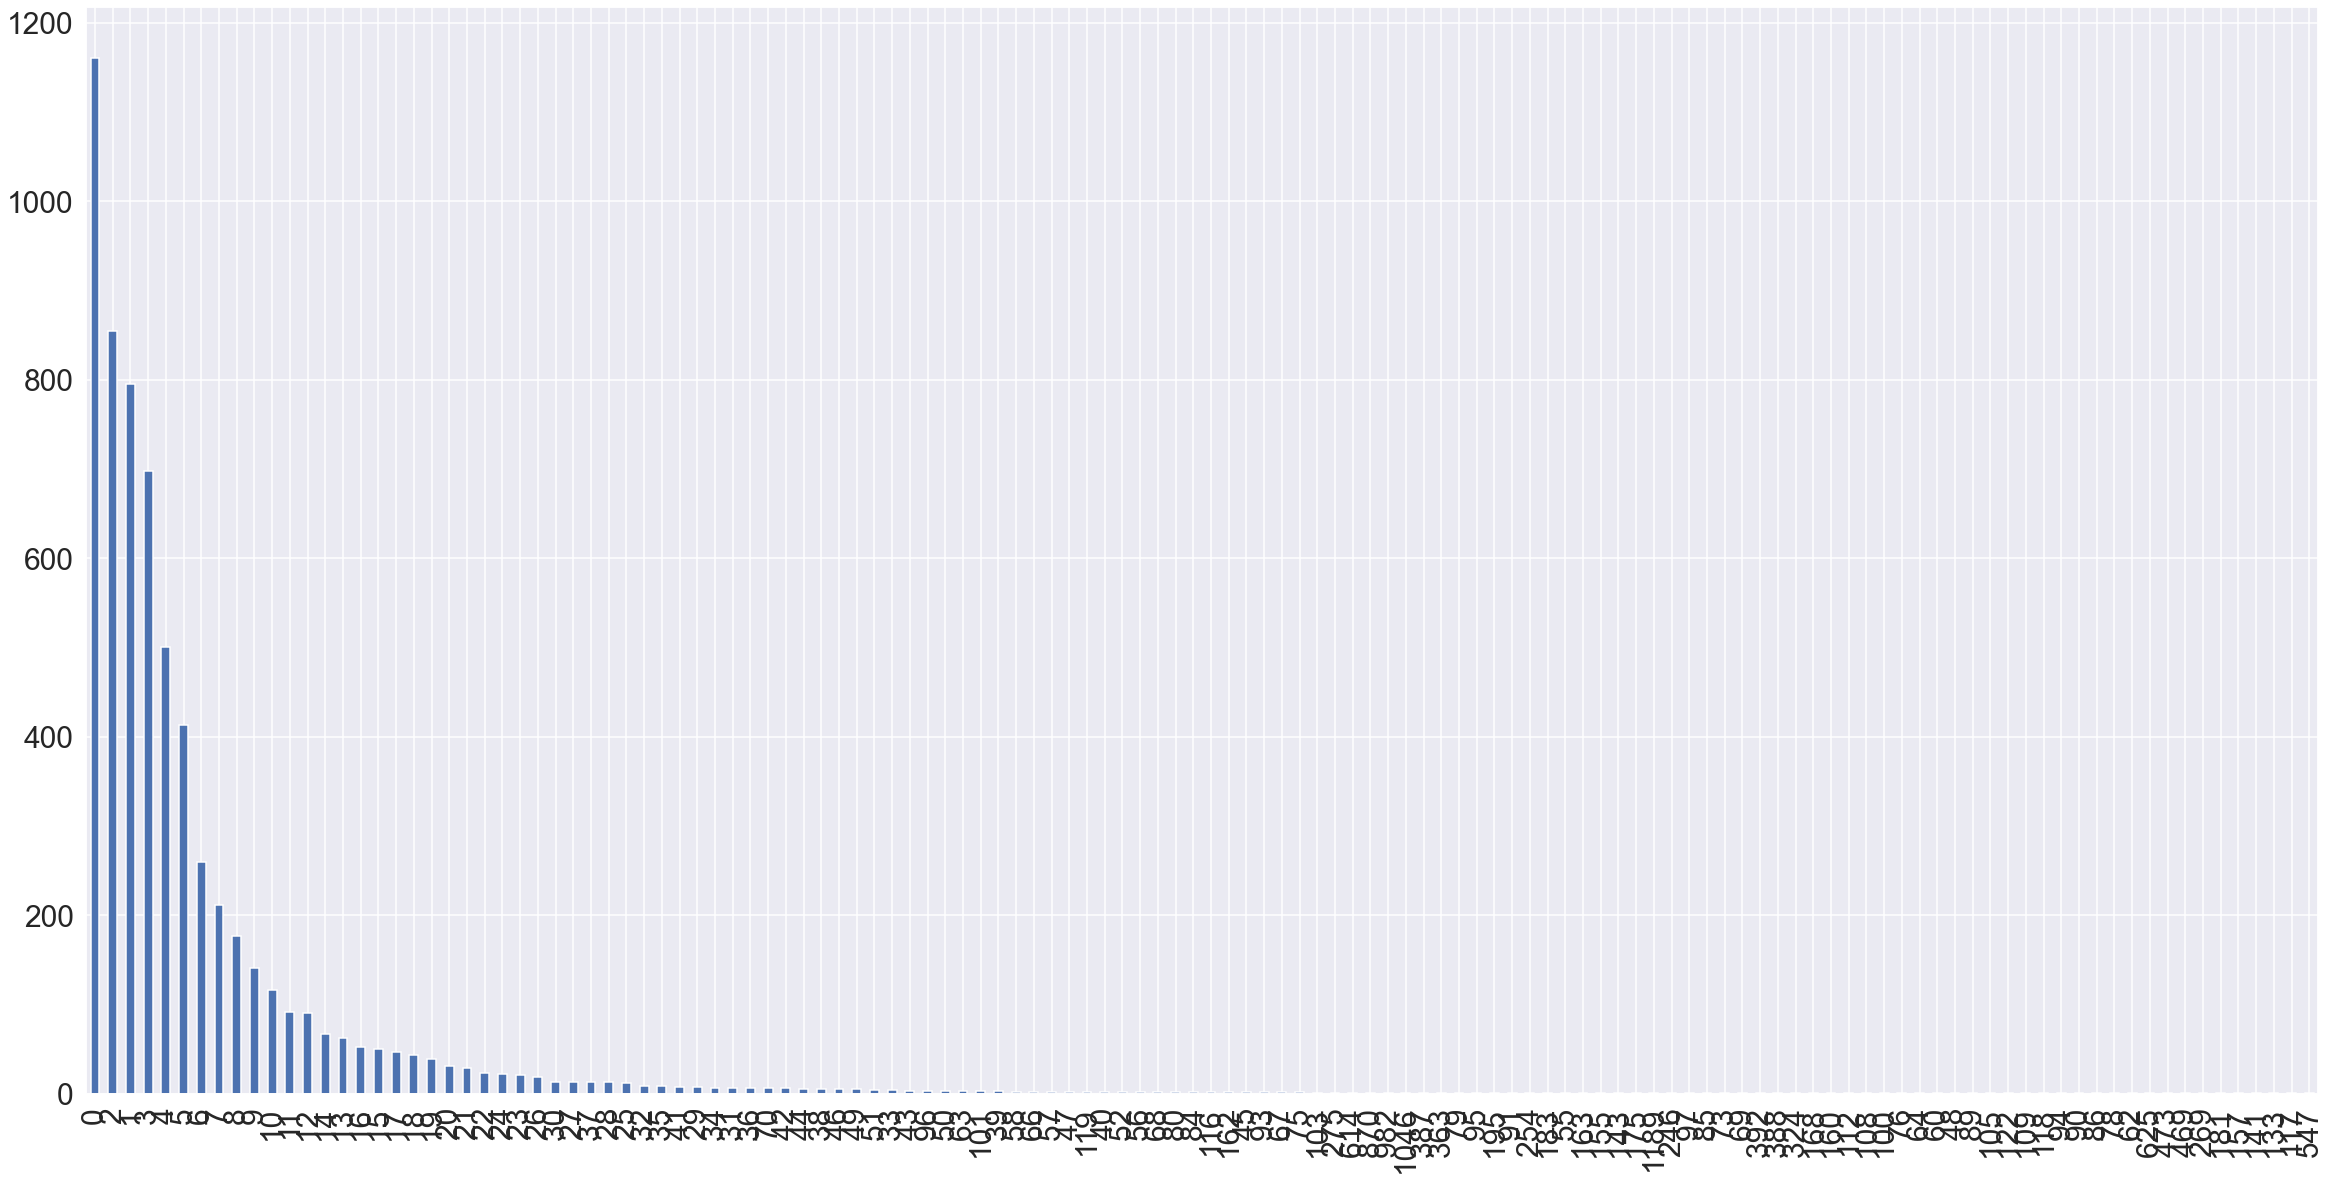

In [12]:
df['relationships'].dropna(inplace=True)
df['relationships'].value_counts().plot(kind='bar', figsize=(40,20), fontsize=30)

***relationships***
- il y a beaucoup de valeurs (de 0 à 547) et sont très mal distribuées ce qui est peut etre un peu trop pour expliquer une variable à deux classes.
- L'hypothèse <strong><span style="color:green">H2</span></strong> est que la corrélation entre relationships et status va augmenter si on applique la transformation par logarithme sur les valeurs numérisées de relationships.***status***.

<AxesSubplot:>

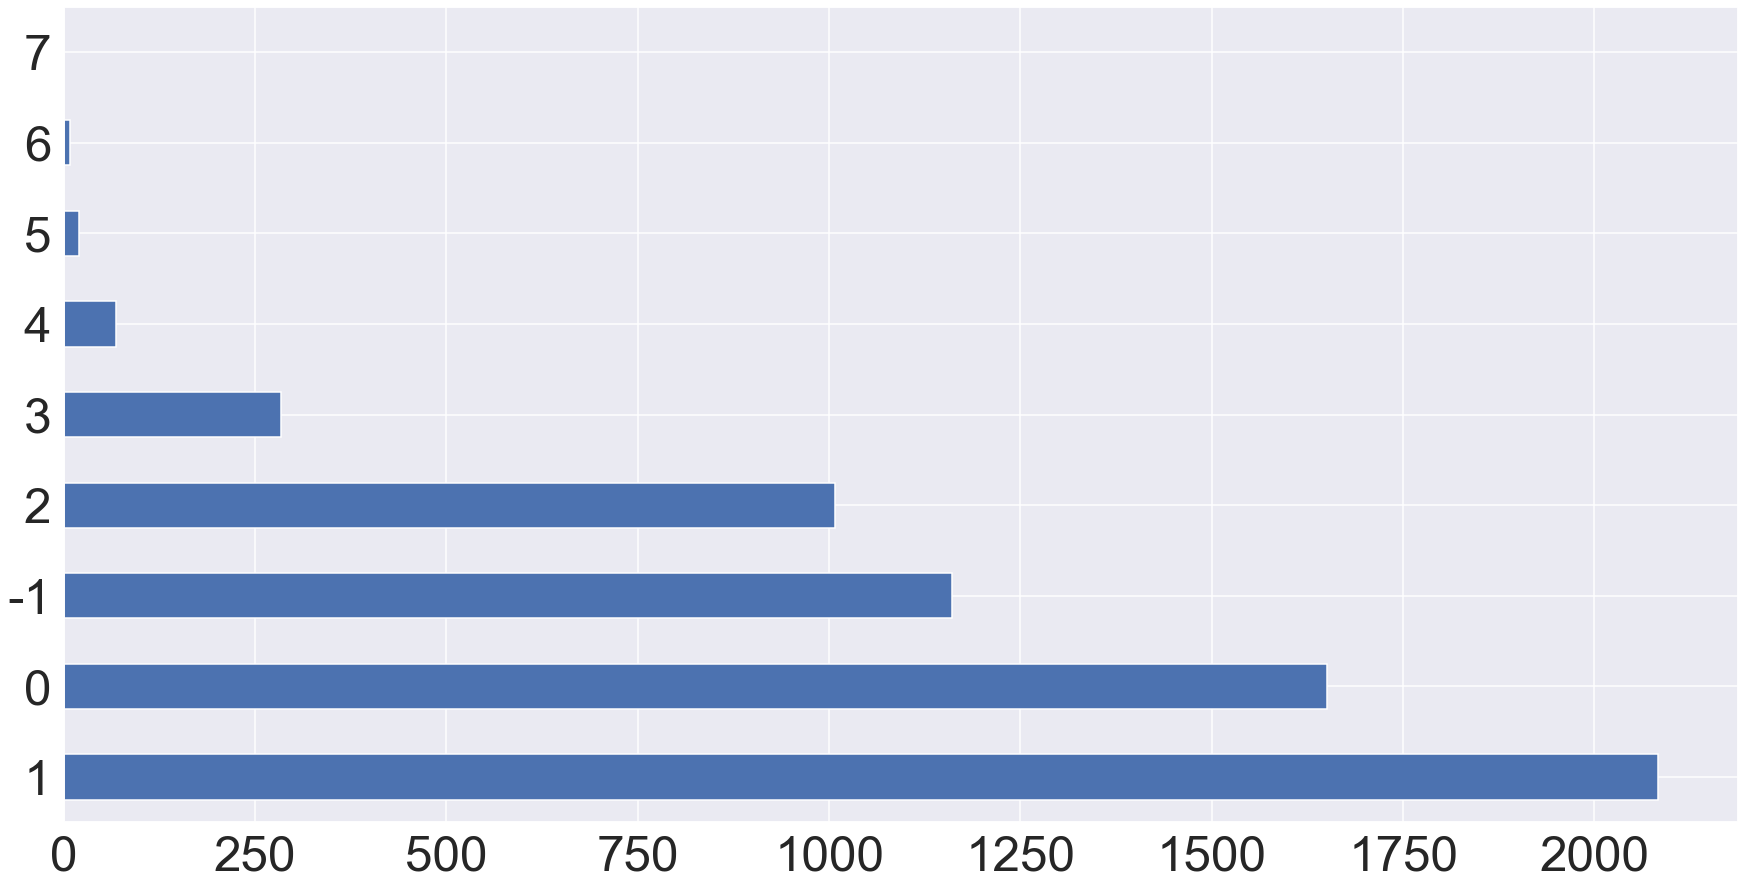

In [13]:
df['rel_log'] = np.log(df['relationships'])
df['rel_log'].replace({-float('inf'):-1}, inplace=True)
df["rel_log"] = df["rel_log"].apply(np.int64)
df['rel_log'].value_counts().plot(kind='barh', figsize=(30,15))

In [14]:
df["status"].corr(df['relationships'])>df["status"].corr(df['rel_log'])

False

<strong><span style="color:green">H2</span></strong> est acceptée .

<AxesSubplot:>

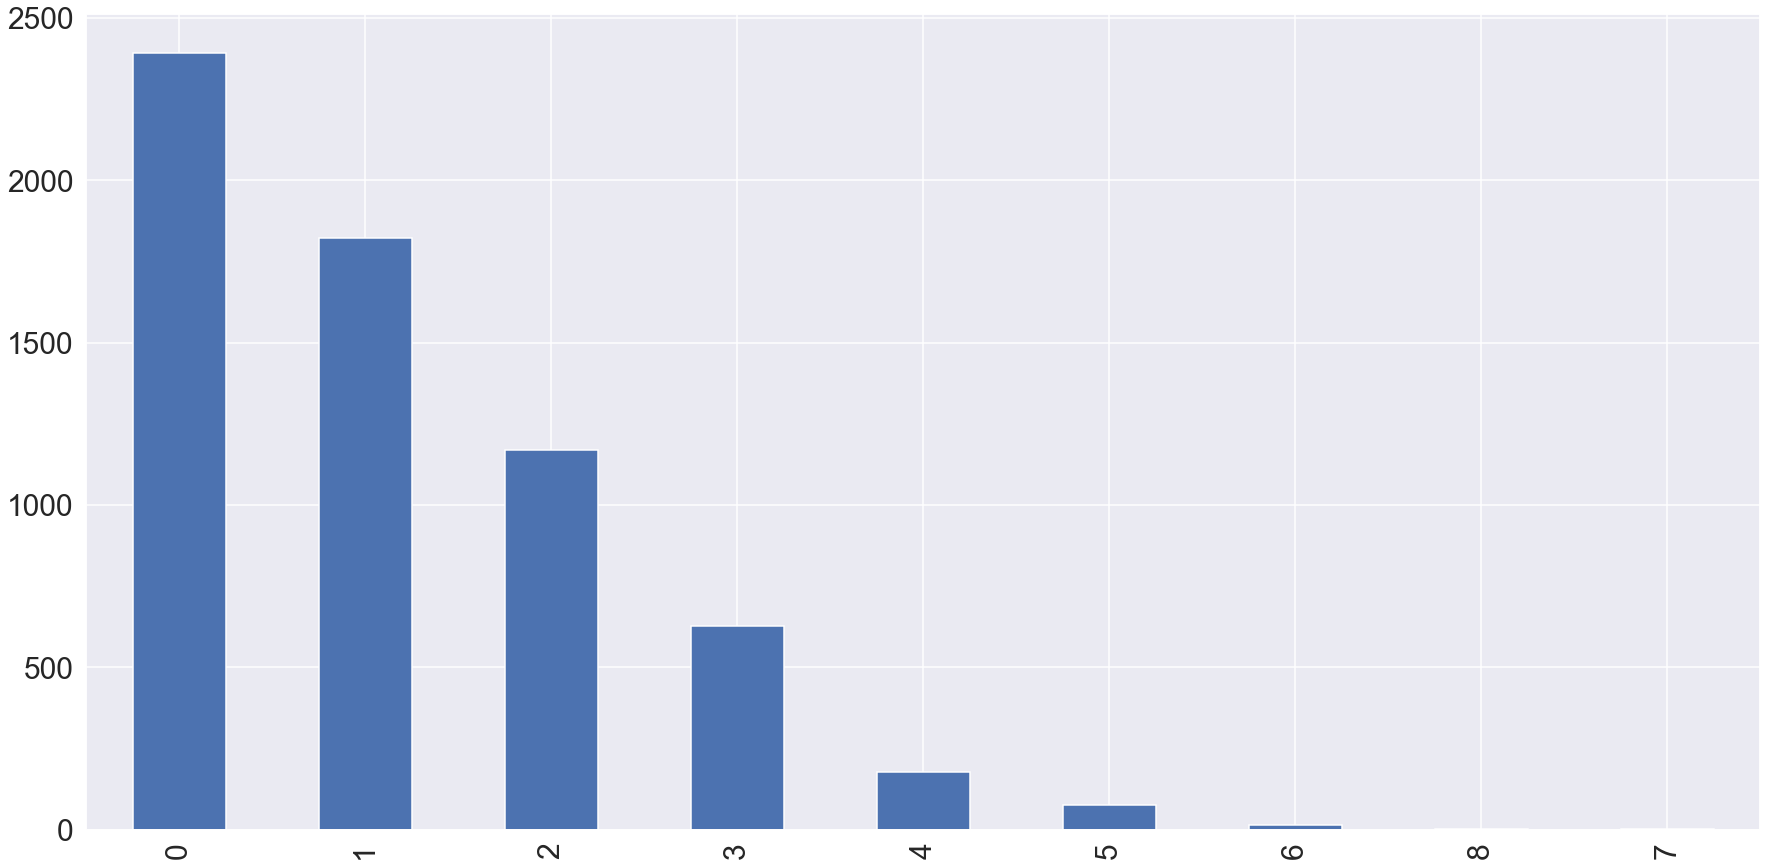

In [15]:
df['milestones'].value_counts().plot(kind='bar', figsize=(30,15), fontsize=30)

***Milestones***
- Les valeurs de la colonnes Milestones sont normalement distribuées et ayant seulement 9 classes, alors la colonne est prete pour etre utilisé pour la modélisation. 

In [16]:
data = df.groupby('country_code').agg('count')*100/len(df)
print(data.status)

country_code
AUS     0.031837
CAN     0.015918
DEU     0.015918
GBR     0.063674
GIN     0.015918
IND     0.031837
ISR     0.031837
MYS     0.015918
NIC     0.015918
SAU     0.015918
UMI     0.015918
USA    99.729386
Name: status, dtype: float64


99.73% des startup sont sur les Etats-Unis et 0.27% représentent des anomalies.

In [17]:
df.drop(df.loc[df['country_code']!='USA'].index, inplace=True)

<AxesSubplot:>

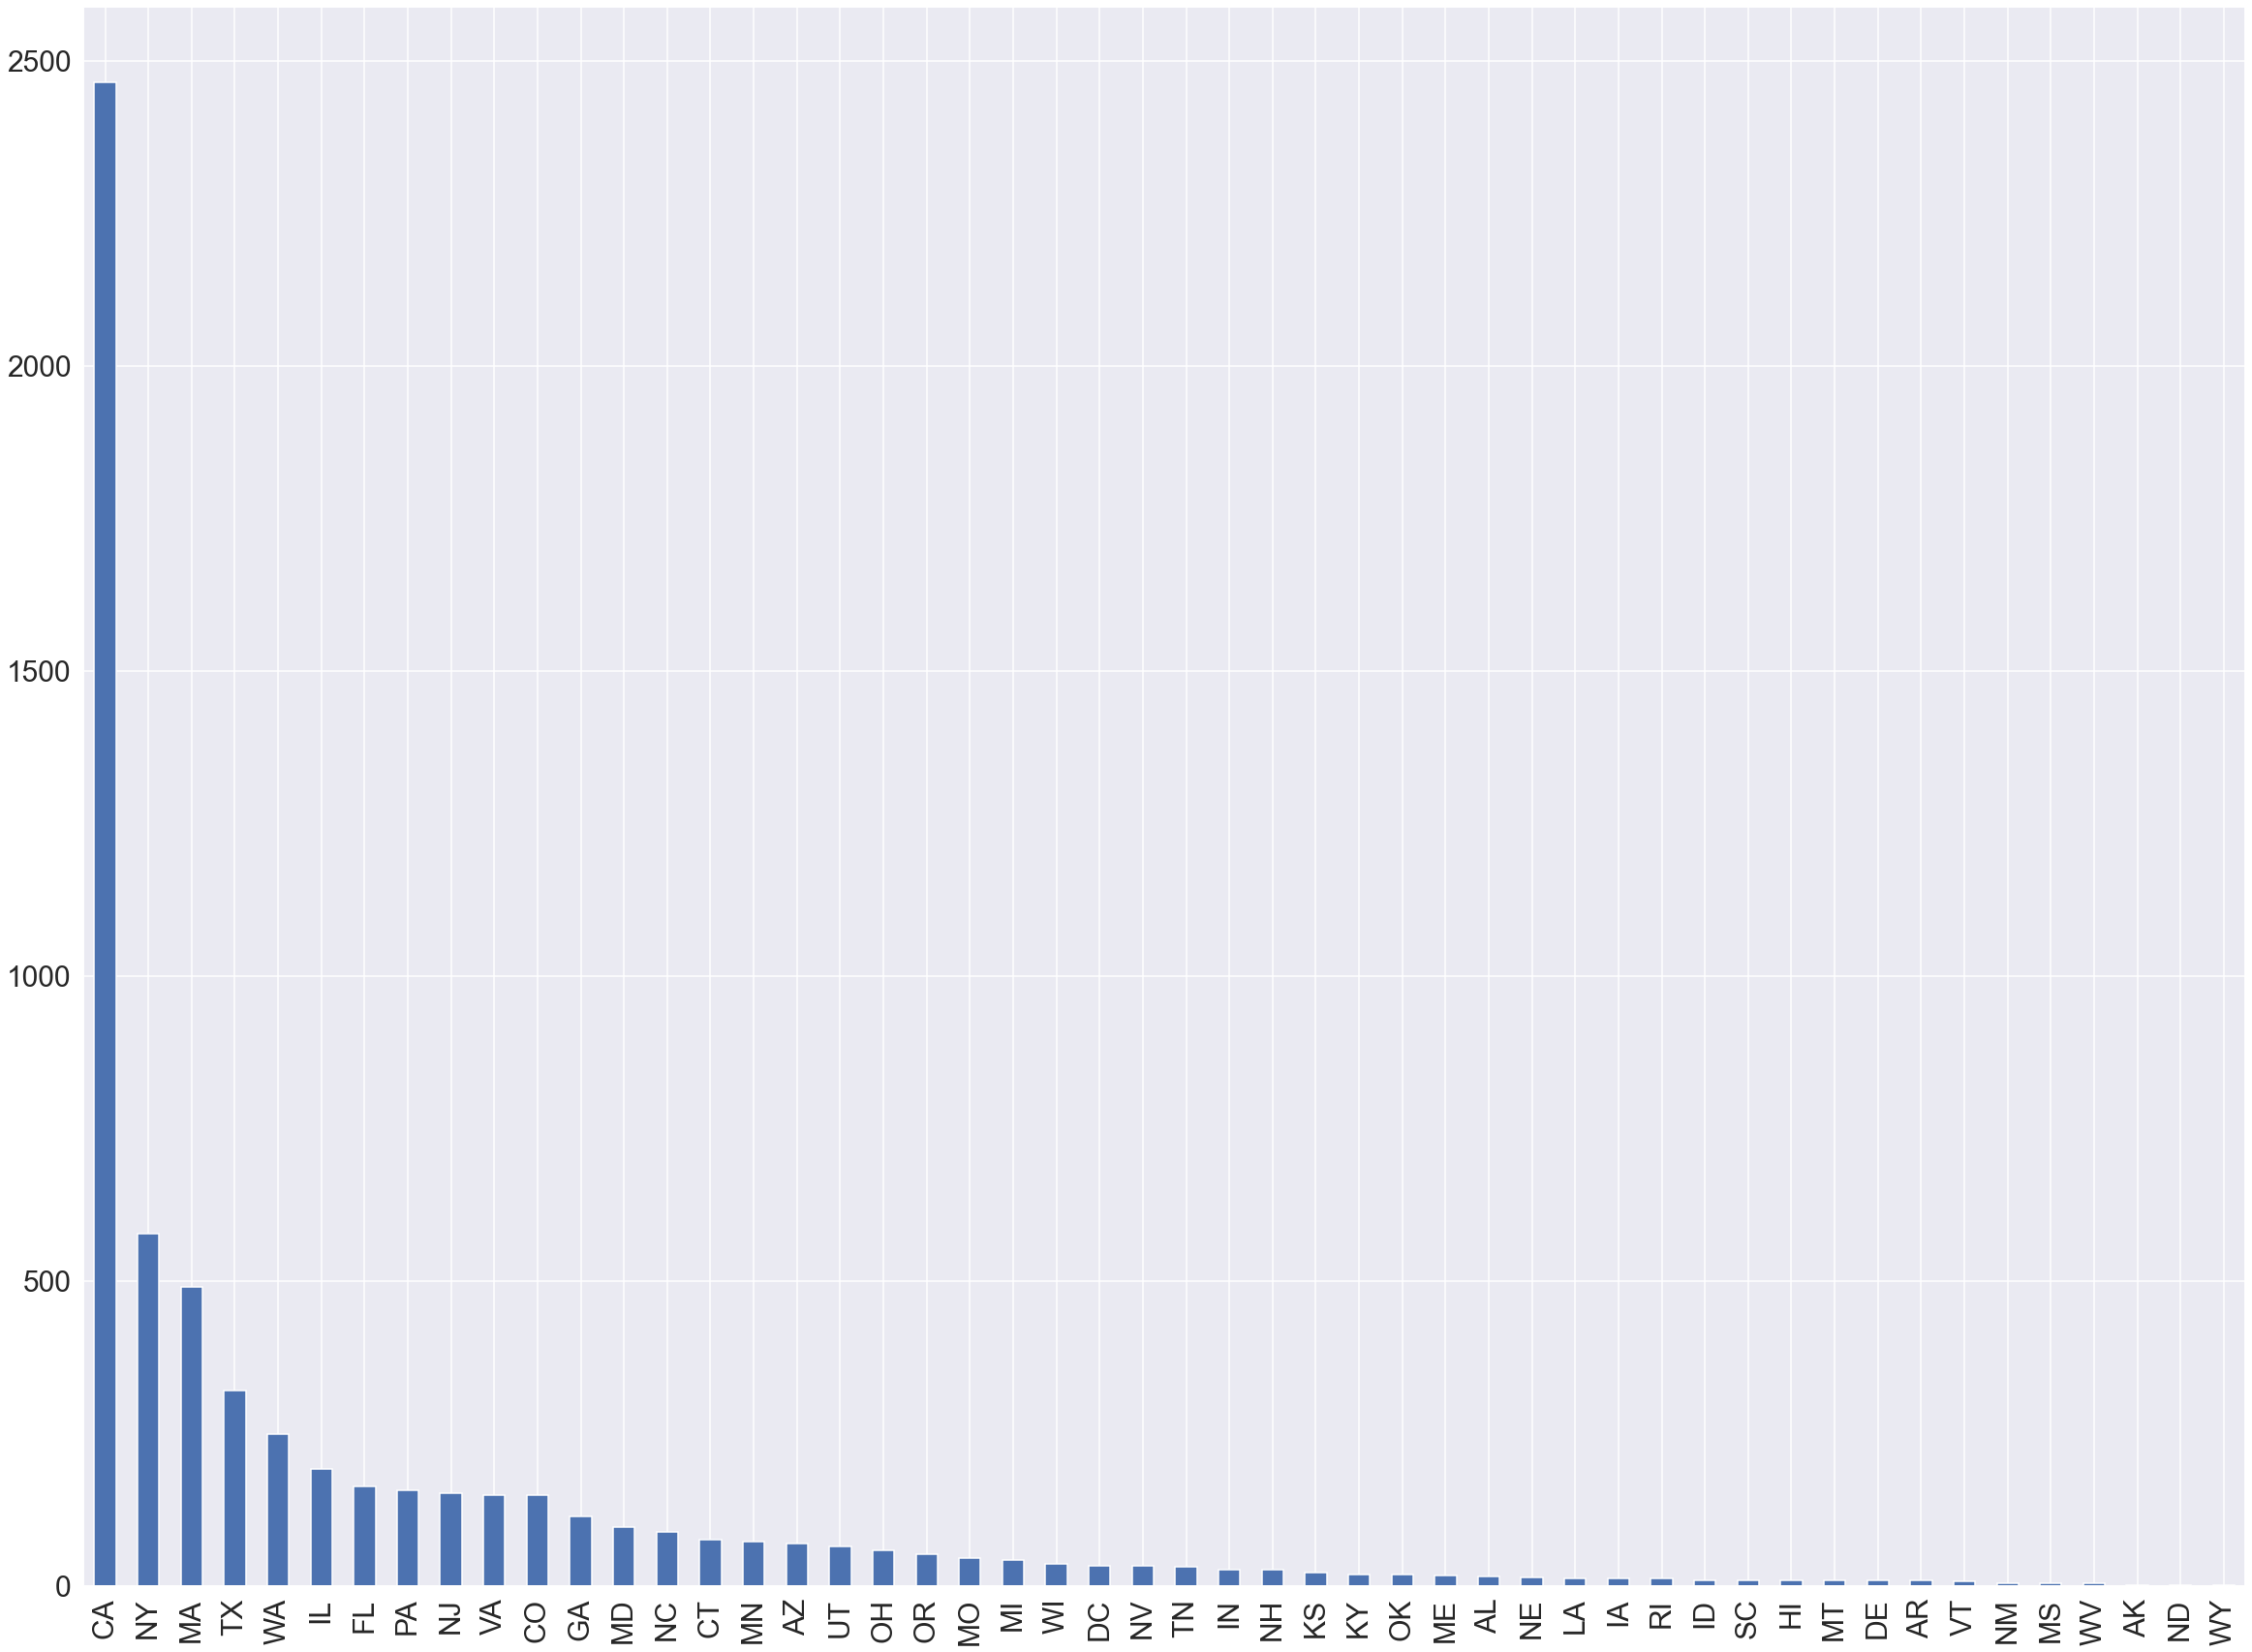

In [18]:
df['state_code'].value_counts().plot(kind='bar', figsize=(40,30), fontsize=30)

***state_code***
- On peut constater que la distribution est normale sauf pour la valeur 'CA' qui est en large <strong>excès</strong>, cela peut affaiblir la précision du modèle.
- Il est indispensable alors de supprimer des lignes contenant la valeur 'CA' pour state_code.

In [19]:
ca = df[df['state_code']=='CA']

In [20]:
ca_ = [int (x) for x in list(ca[0:1600].index[0:1600].values)]
for x in ca_:
    df.drop(labels=x, axis=0, inplace=True)

<AxesSubplot:>

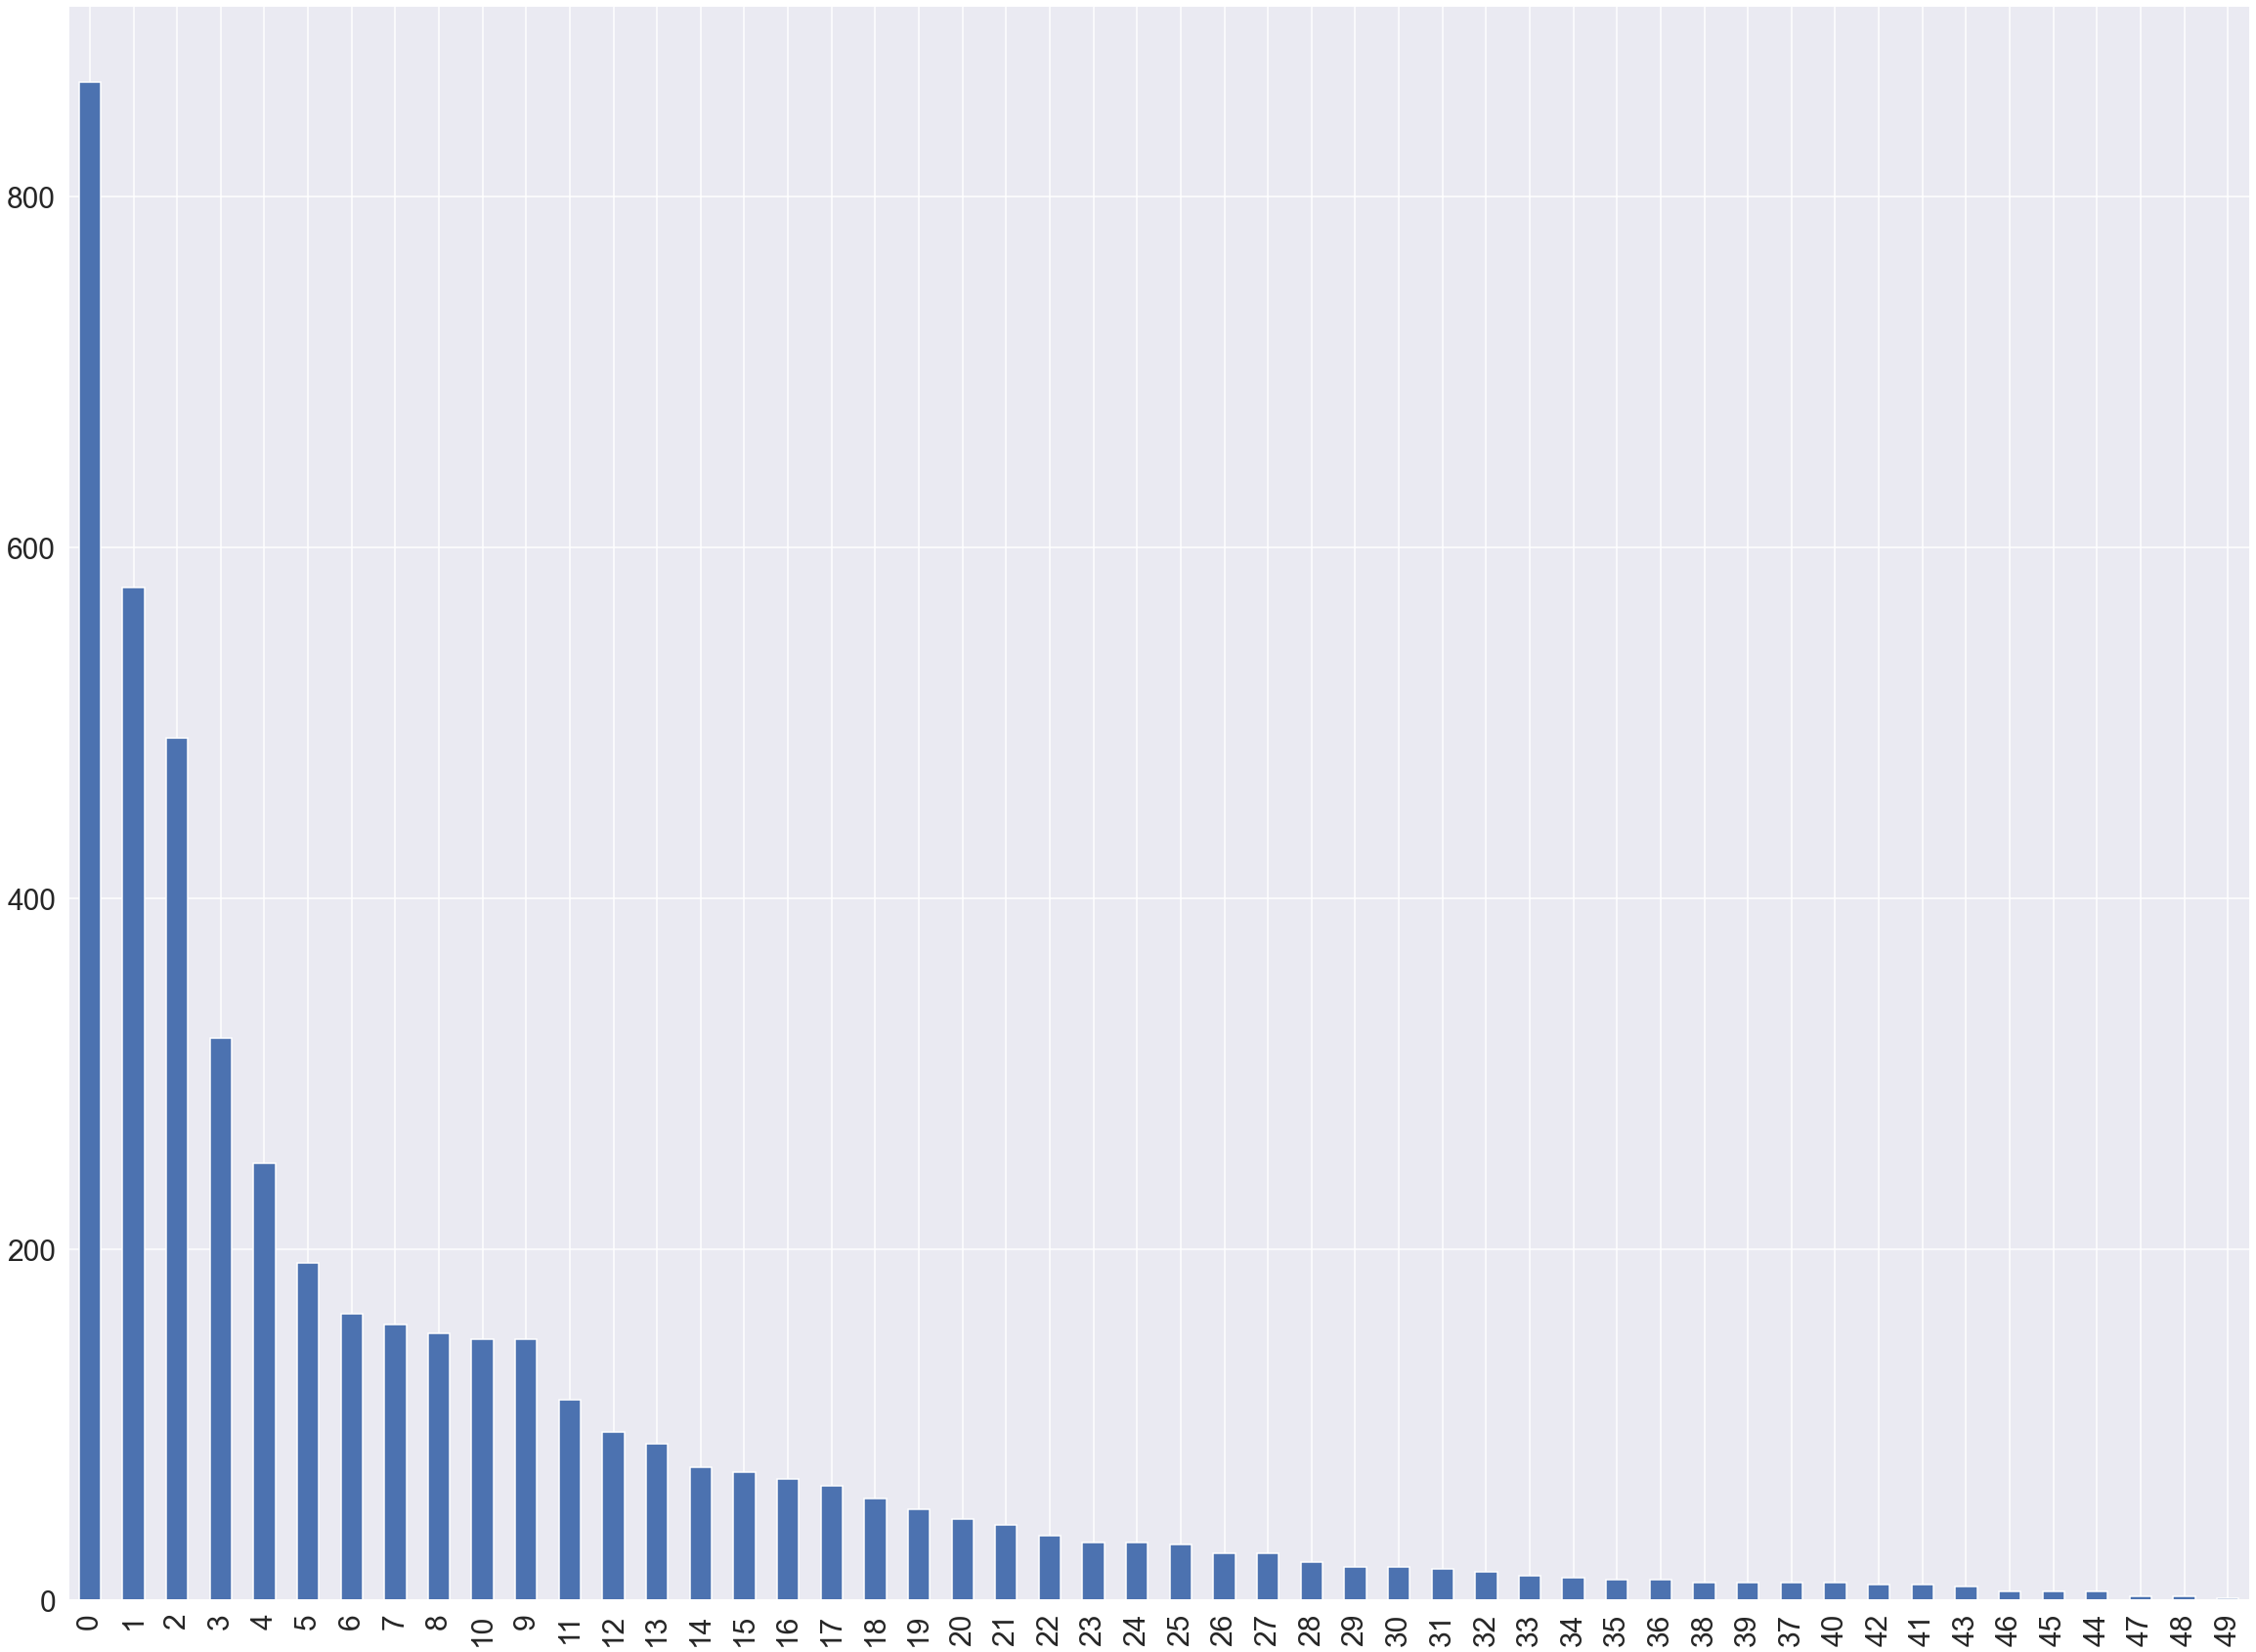

In [21]:
state_dic = {x.split(" ")[0]:i for i,x in enumerate(str(df['state_code'].value_counts()).split("\n"))}
df['state_code'].replace(state_dic, inplace=True)
df['state_code'].value_counts().plot(kind='bar', figsize=(40,30), fontsize=30)

- Maintenant, on peut dire que la distribution est normale.

<AxesSubplot:>

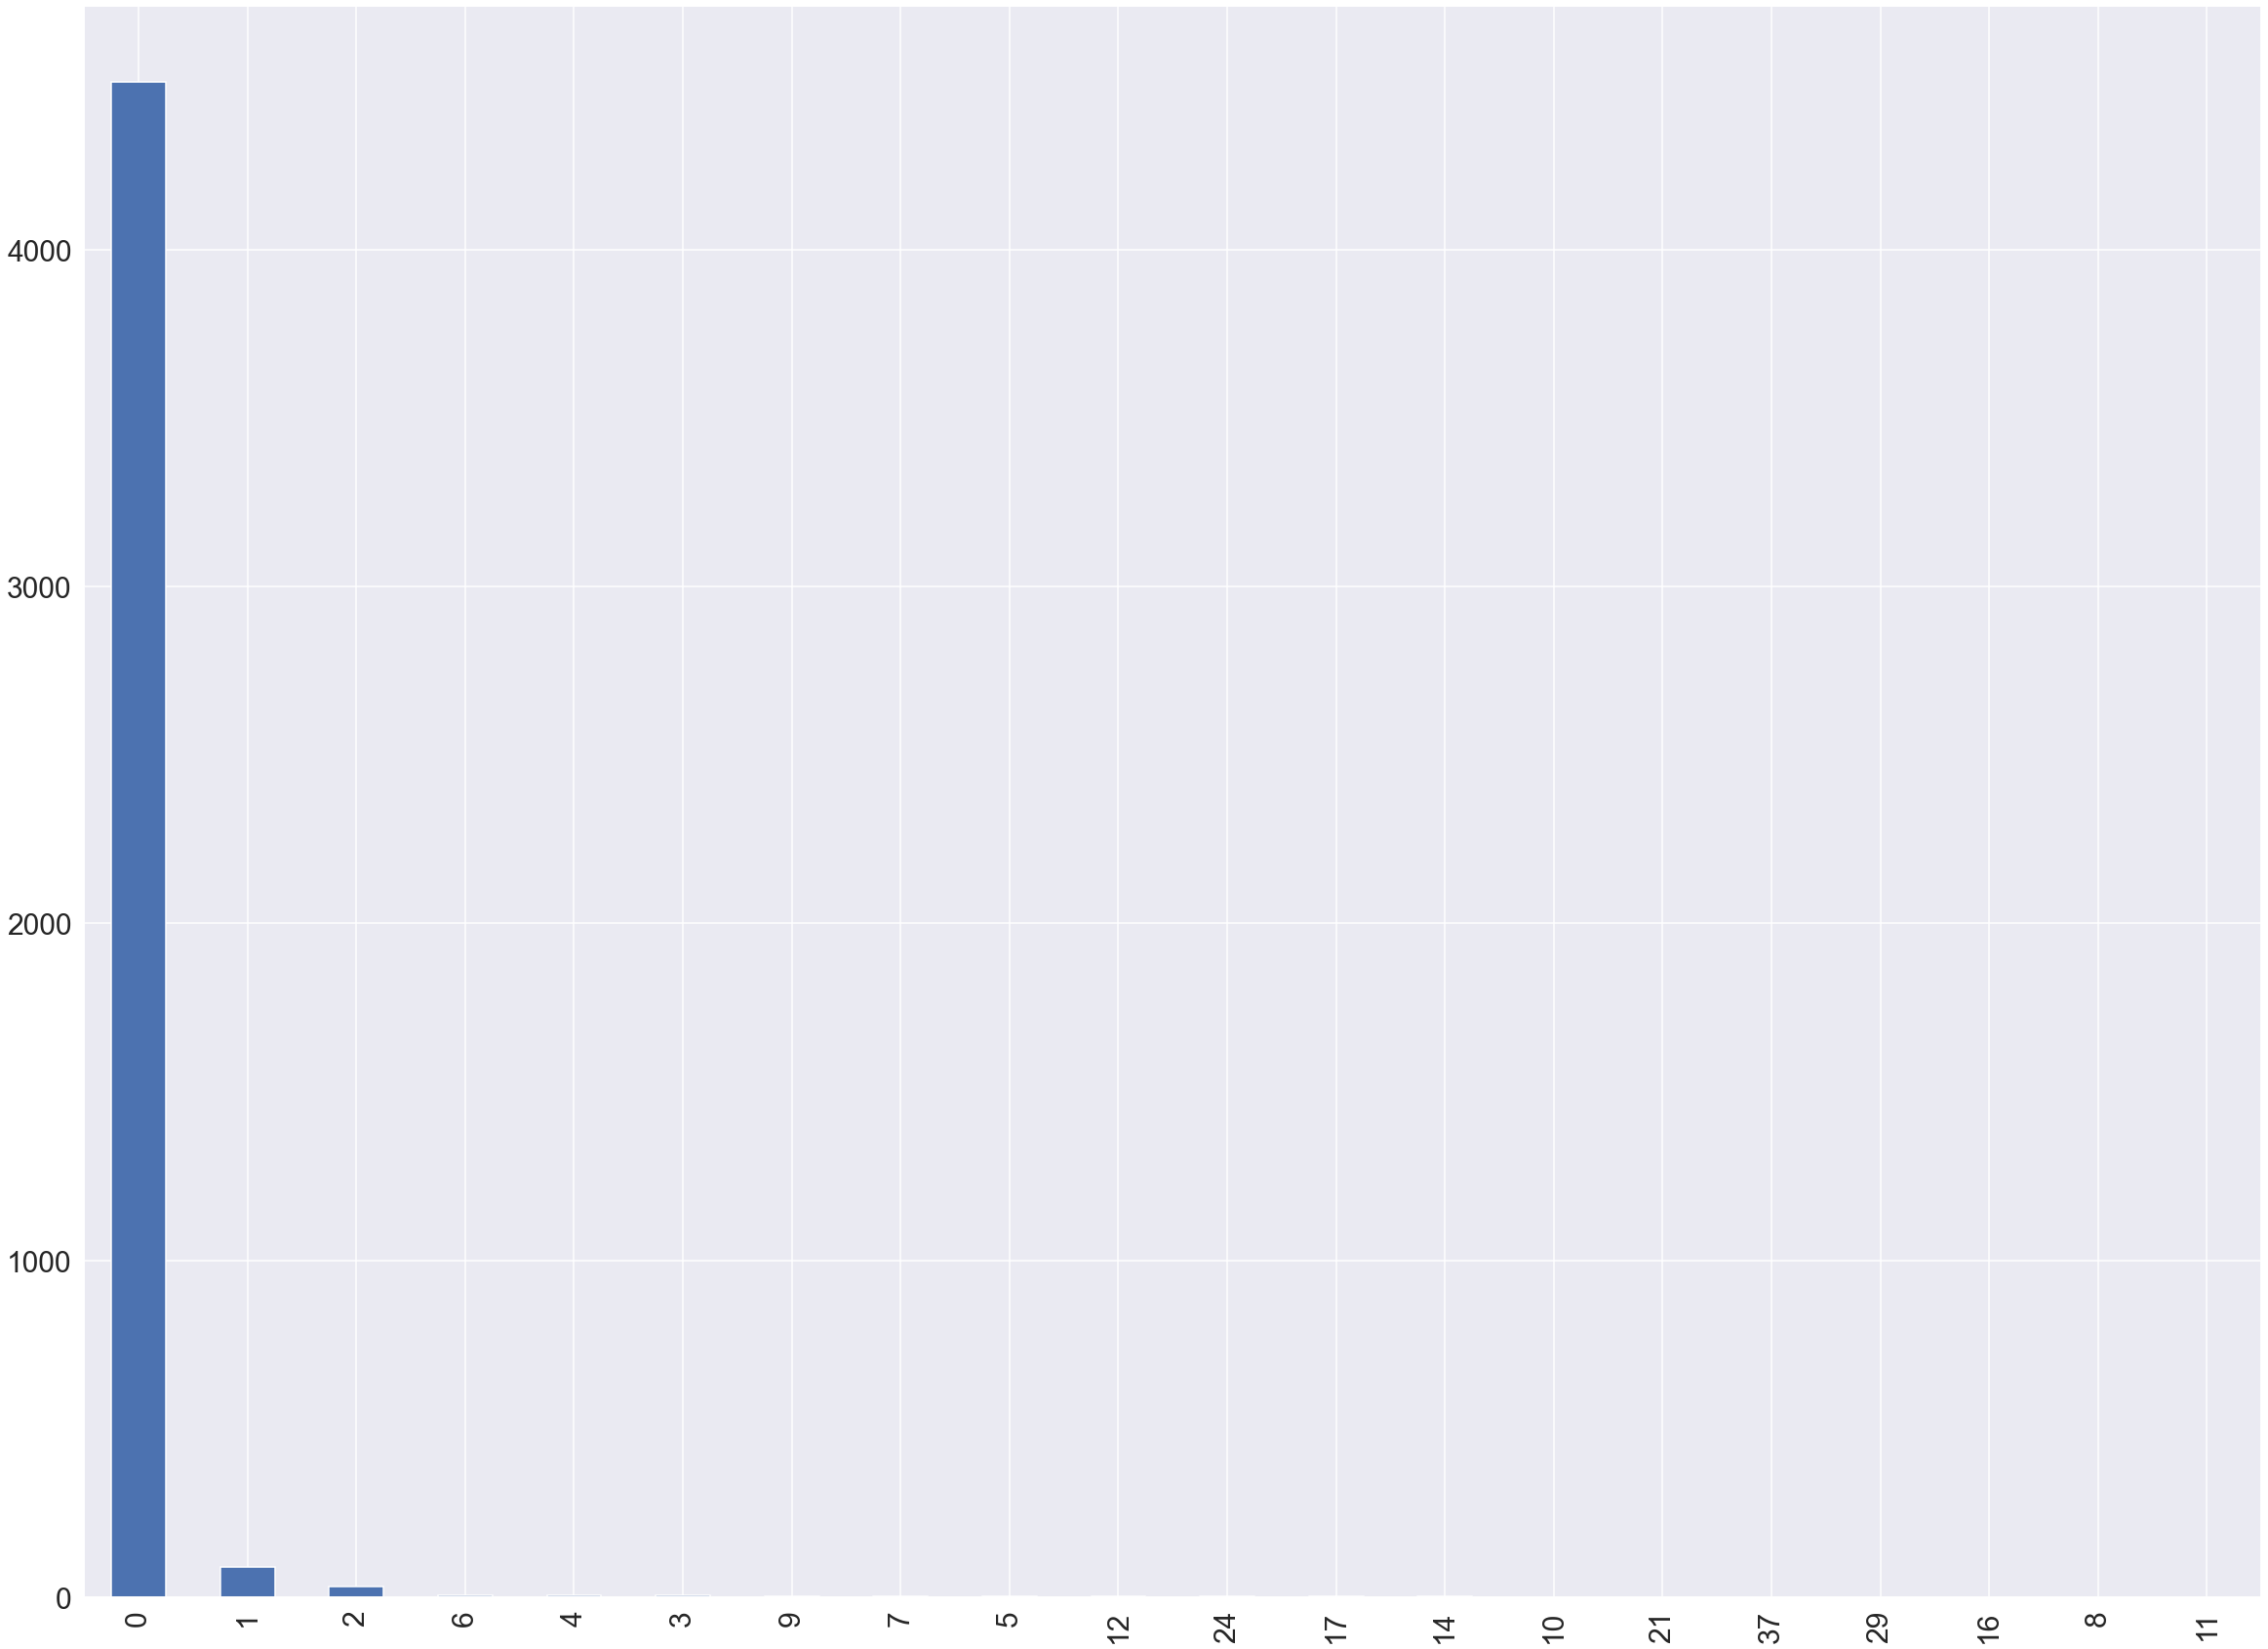

In [22]:
df['investment_rounds'].value_counts().plot(kind='bar', figsize=(40,30), fontsize=30)

<AxesSubplot:>

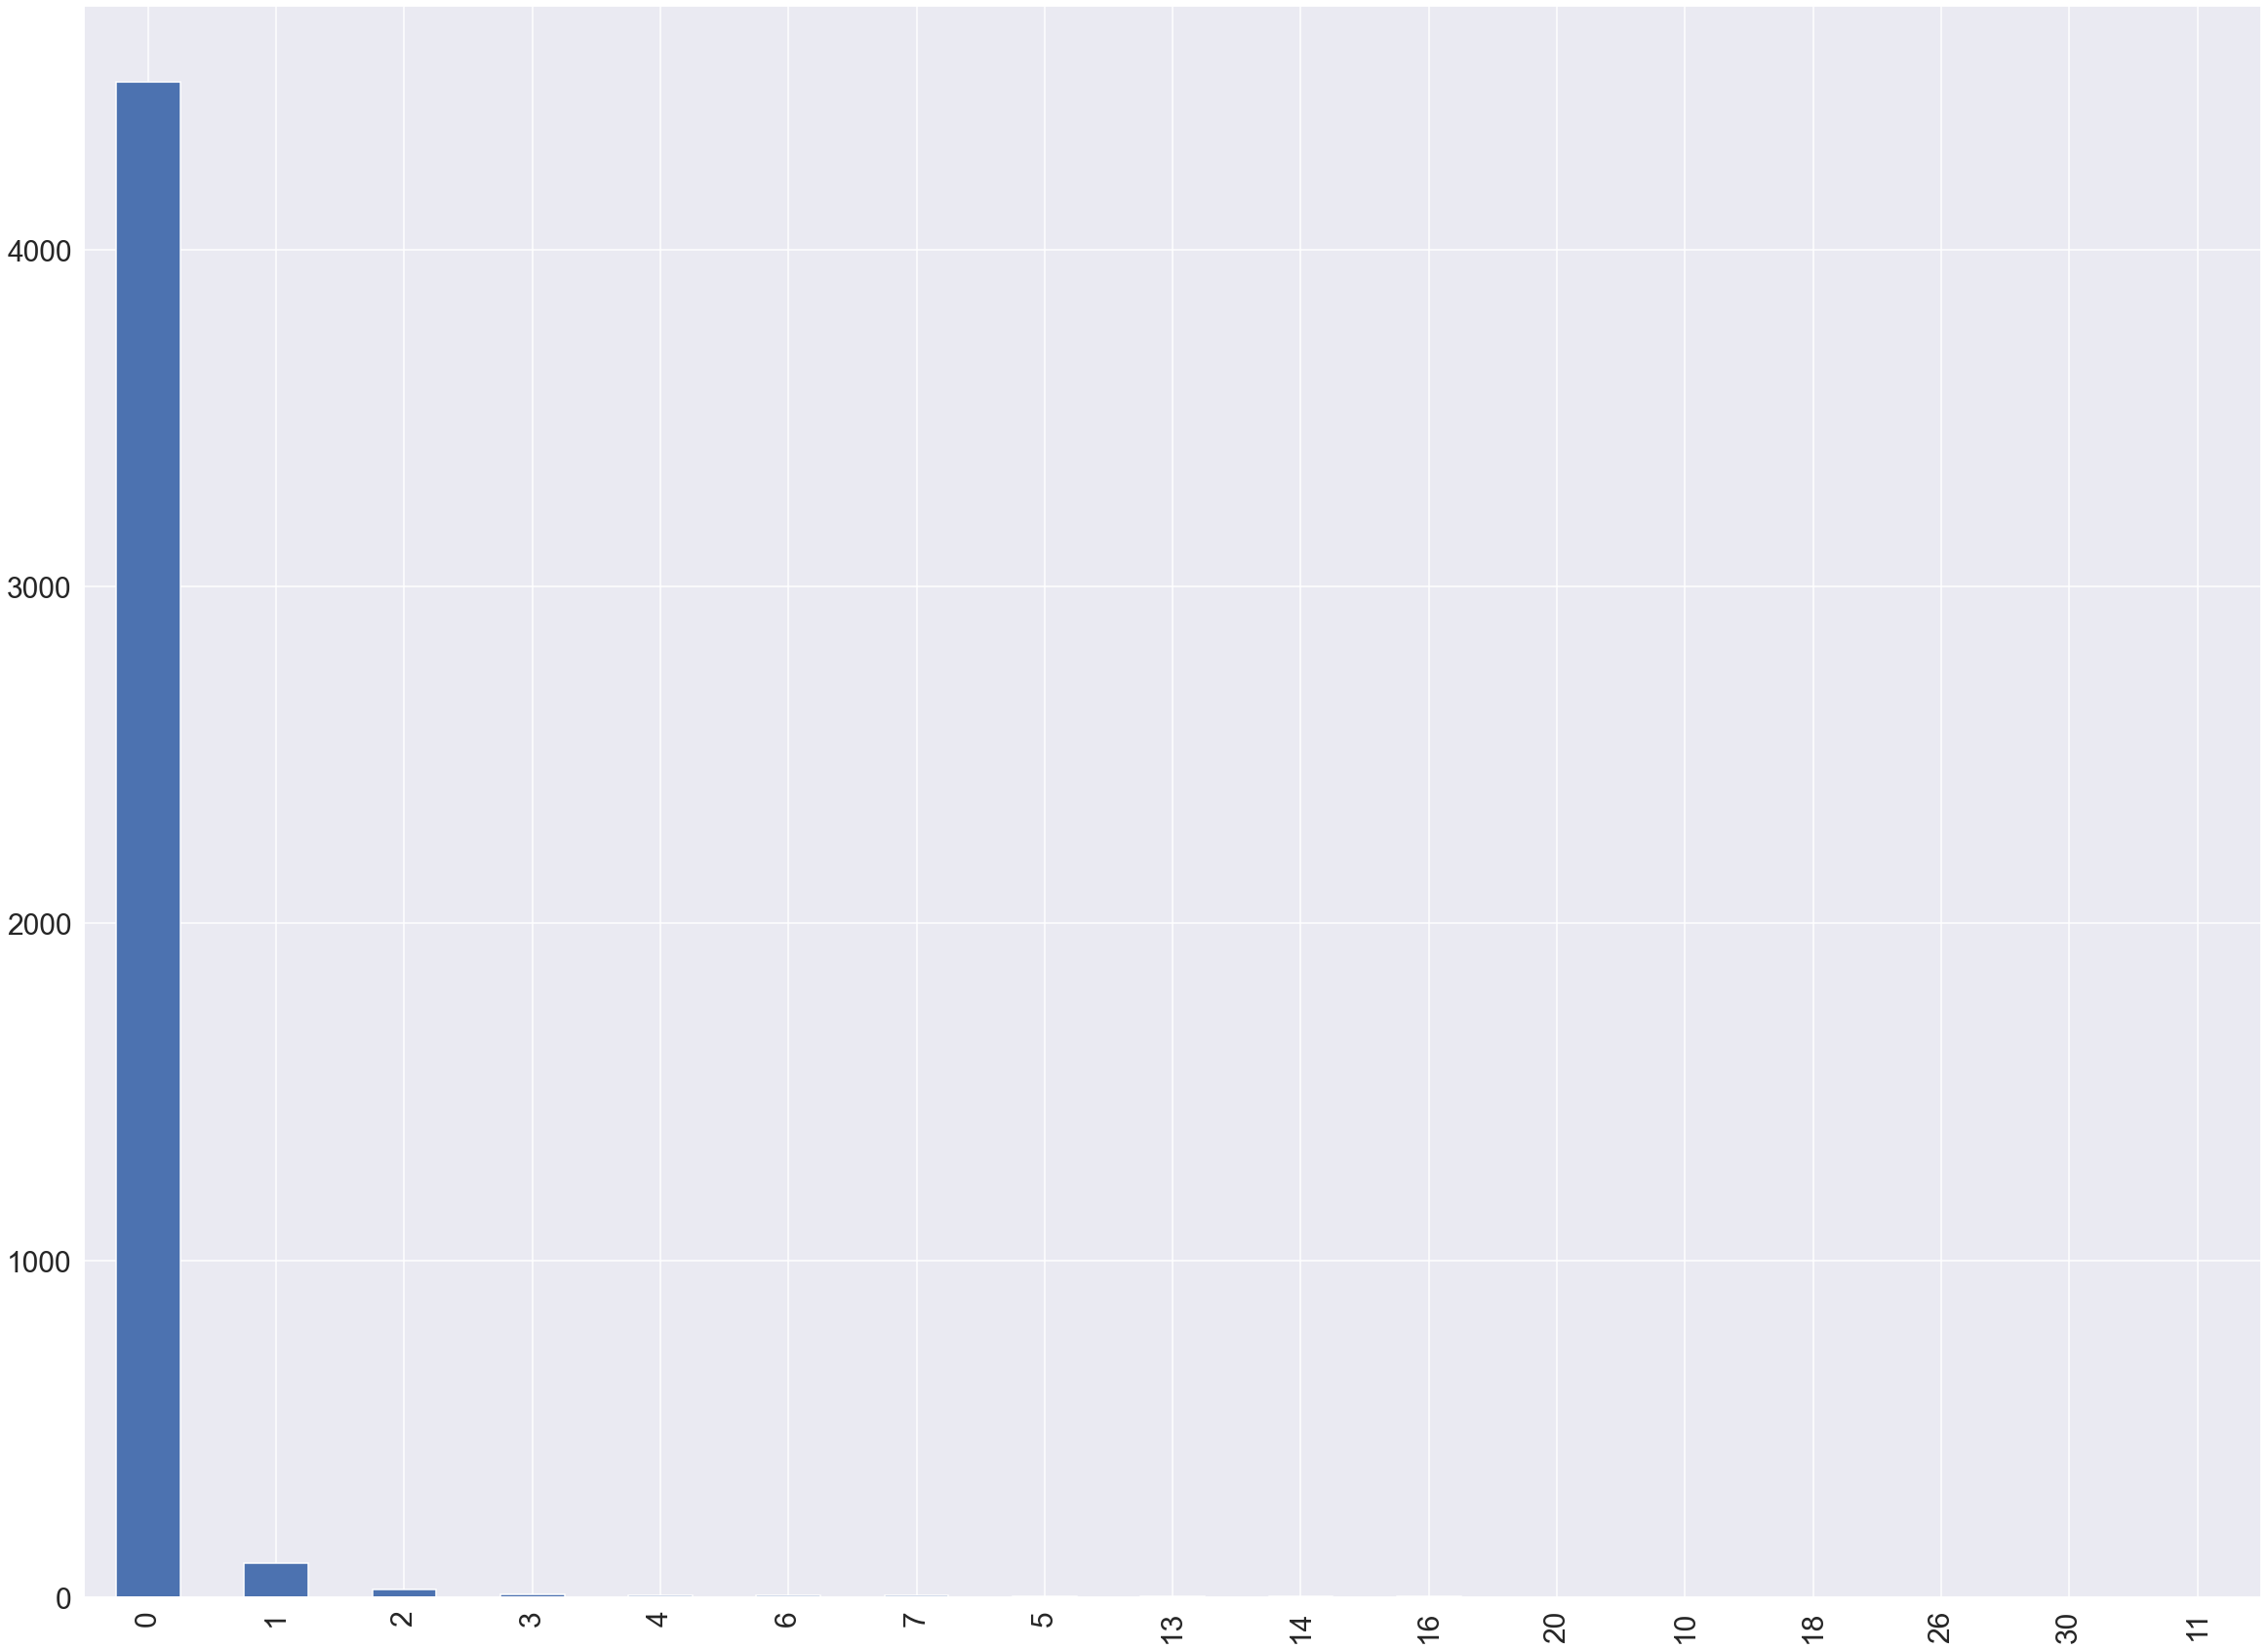

In [23]:
df['invested_companies'].value_counts().plot(kind='bar', figsize=(40,30), fontsize=30)

In [24]:
(df["invested_companies"]==df["investment_rounds"]).describe()

count     4665
unique       2
top       True
freq      4623
dtype: object

***investment_rounds*** et ***invested_companies***
- Il y a une grande disproportion dans ces deux colonnes.
- Sur 4665 lignes, il y en a 4623 qui ont les mêmes valeurs.
<hr>
- <strong><span style="color:green">H3</span></strong> : invested_companies est plus corrélé avec la variable cible que investment_rounds.
- <strong><span style="color:green">H4</span></strong> : La transformée en log a une meilleure corrélation que Le regroupement en deux groupes.

In [25]:
if df["status"].corr(df['invested_companies'])>=df["status"].corr(df['investment_rounds']):
    del df['investment_rounds']
    print('On accepte H3.')
else:
    del df['invested_companies']
    print('On rejette H3.')

On accepte H3.


C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

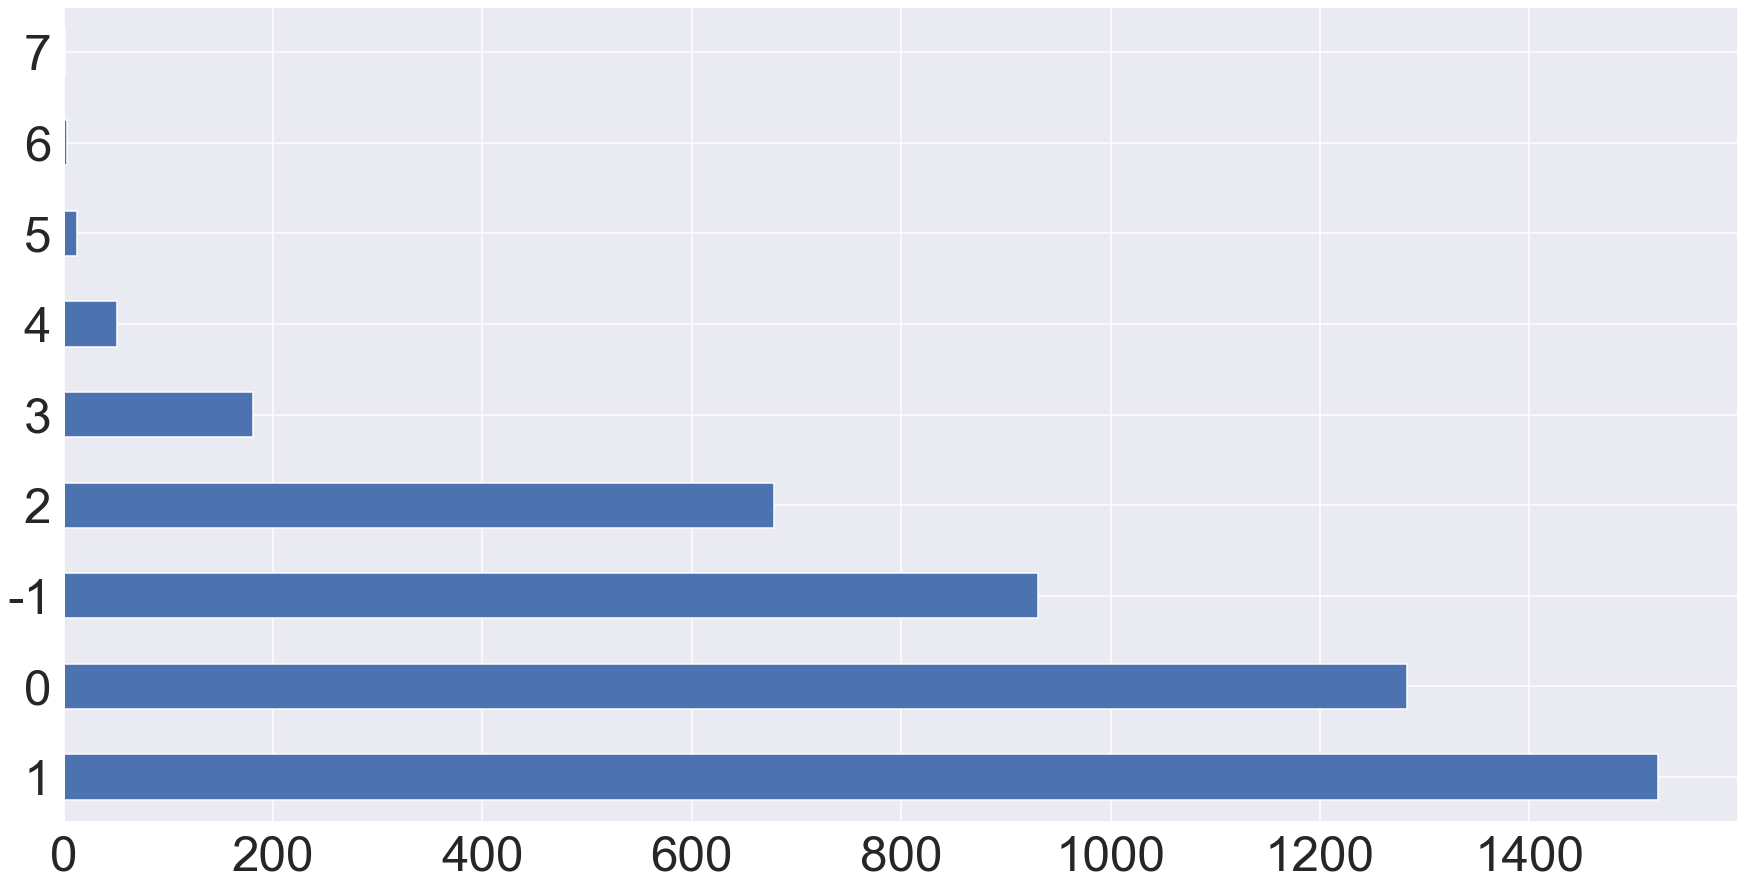

In [26]:
df['invested_companies_log'] = np.log(df['invested_companies'])
df['invested_companies_log'].replace({-float('inf'):-1}, inplace=True)
df["invested_companies_log"] = df["rel_log"].apply(np.int64)
df['invested_companies_log'].value_counts().plot(kind='barh', figsize=(30,15))

<AxesSubplot:>

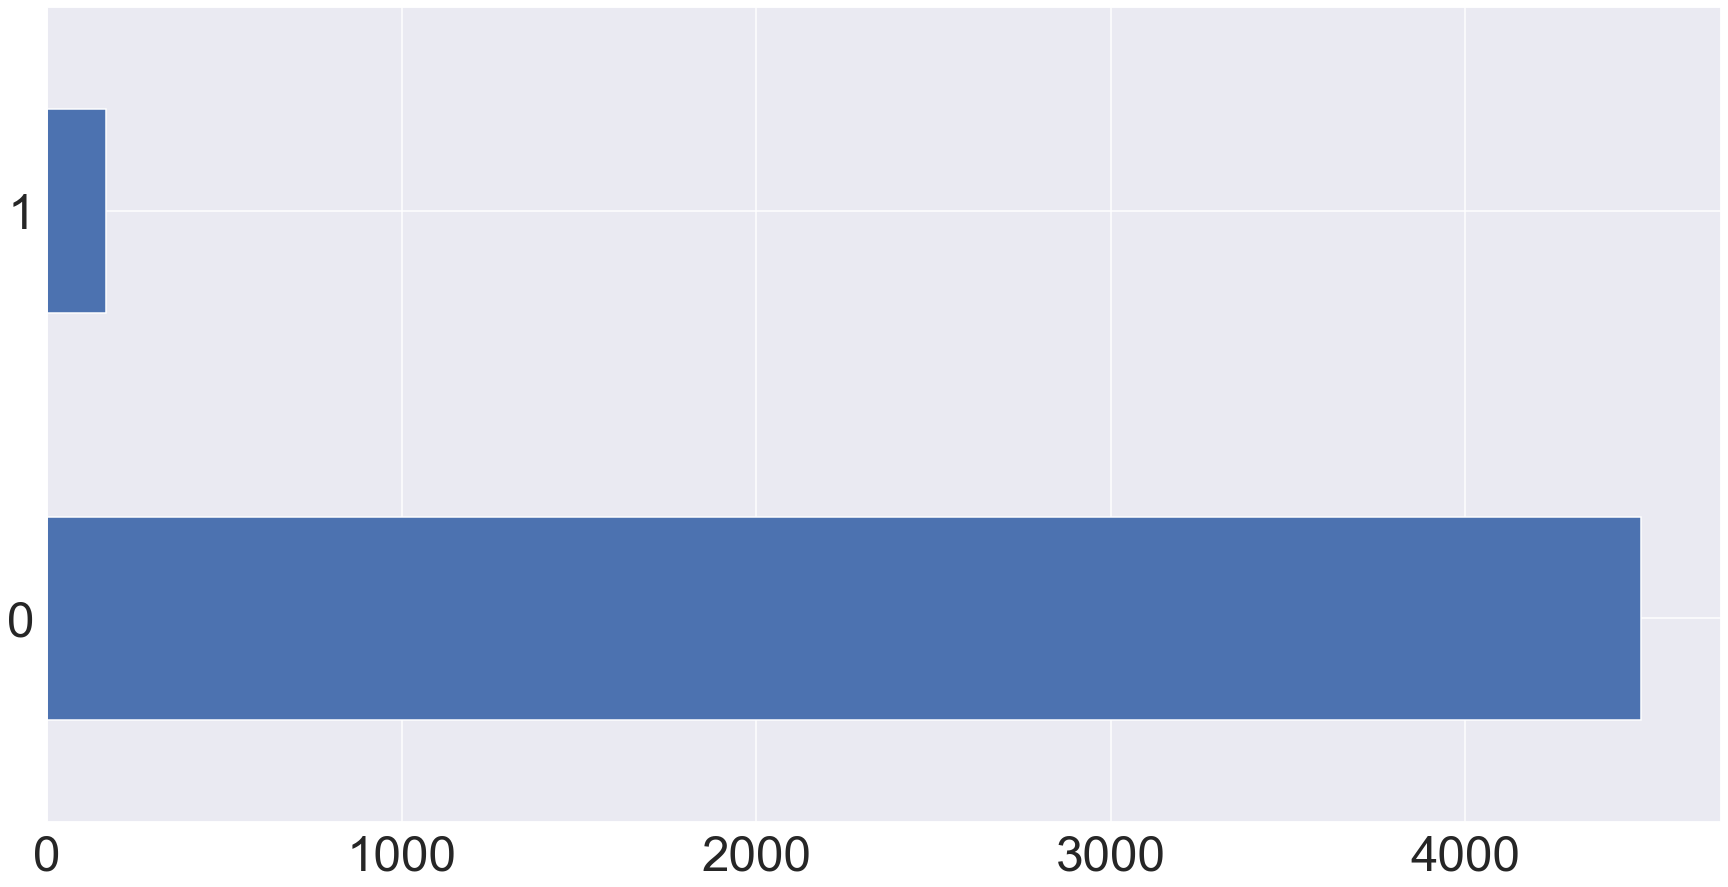

In [27]:
df['invested_companies_'] = df['invested_companies']==0
df['invested_companies_'].replace({False:1, True:0}, inplace=True)
df['invested_companies_'].value_counts().plot(kind='barh', figsize=(30,15))

In [28]:
if df["status"].corr(df['invested_companies_'])>=df["status"].corr(df['invested_companies_log']):
    del df['invested_companies_log']
    print('On rejette H4.')
else:
    del df['invested_companies_']
    print('On accepte H4.')

On accepte H4.


<h3><i>funding_total_usd</i></h3>

In [29]:
df['funding_total_usd'].describe()

count    4.665000e+03
mean     1.337258e+07
std      1.179682e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+06
max      5.700000e+09
Name: funding_total_usd, dtype: float64

In [30]:
funding_ = pd.DataFrame(df[df['funding_total_usd']>0]).describe()
funding_ ["funding_total_usd"]

count    2.136000e+03
mean     2.920557e+07
std      1.730276e+08
min      1.000000e+03
25%      1.400000e+06
50%      6.225824e+06
75%      1.962500e+07
max      5.700000e+09
Name: funding_total_usd, dtype: float64

***funding_total_usd***
- Les valeurs de cette variable explicatives est une variable continue qui désigne le totale des fonds en USD. 
- La colonne connait une très forte variance, comme indiqué dans les deux cellules ci dessous avec +50% des valeurs sont nulles et les autre varient entre 1000 USD et 5.7e+09 USD.
<hr>
- <strong><span style="color:green">H5</span></strong> : Une transformation en logarithme explique mieux la variable cible comparant à un regrougement de classes basé sur les graphiques en termes de corrélations.

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

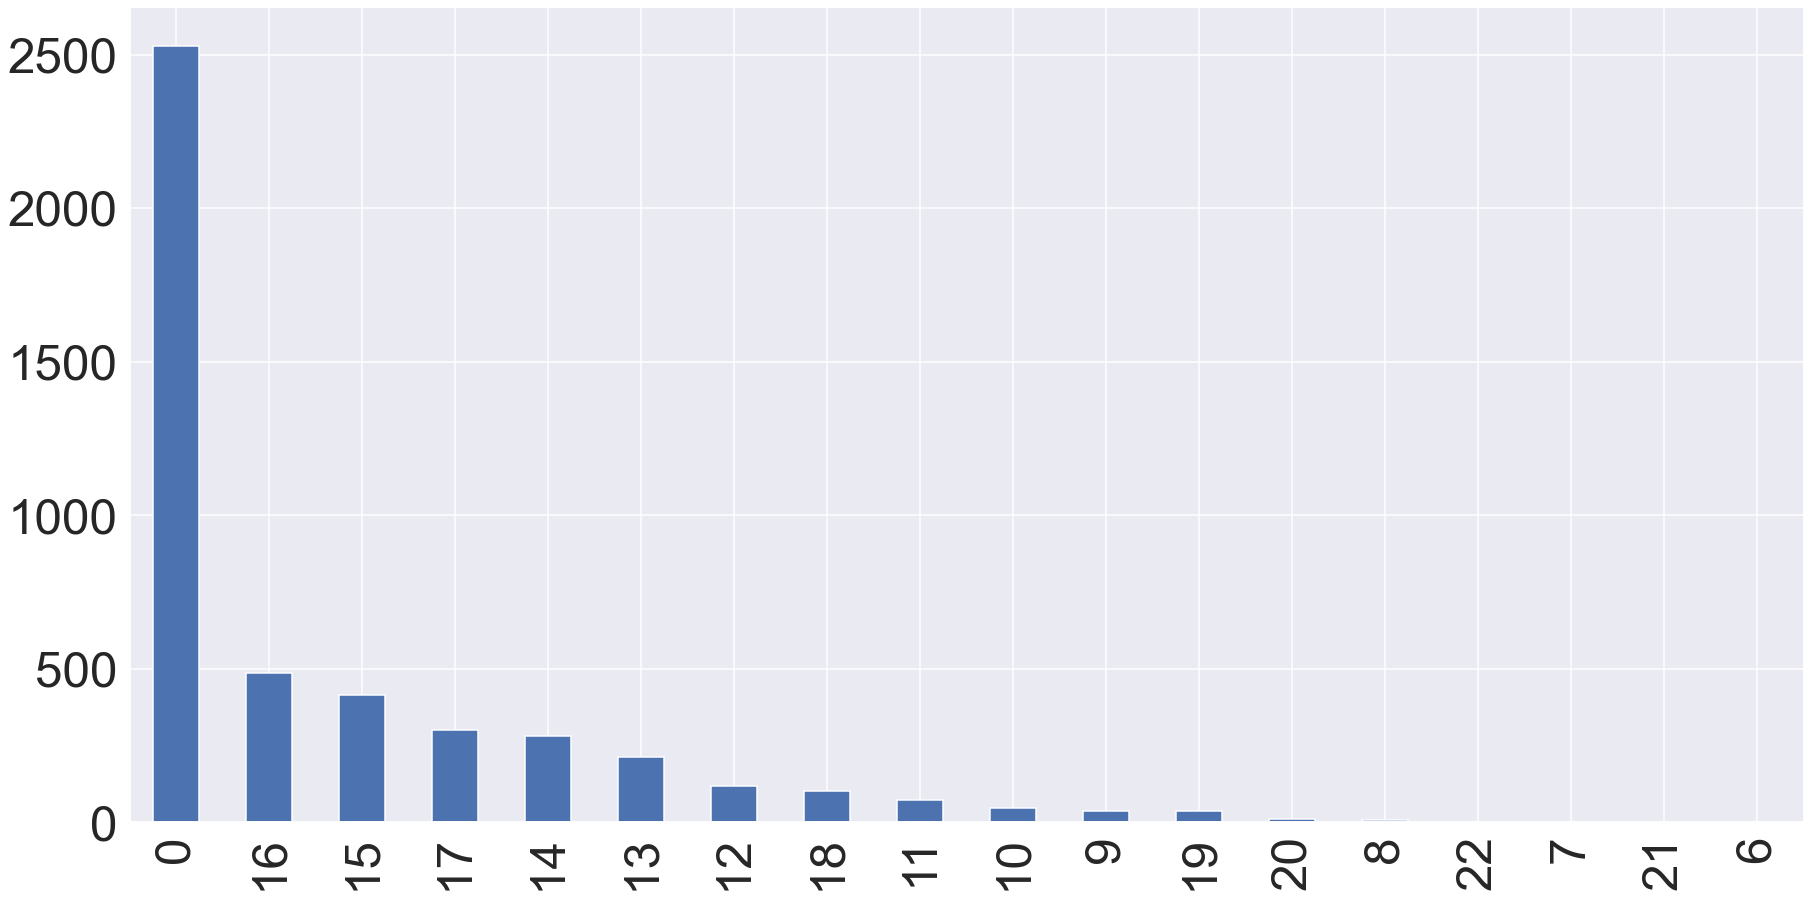

In [31]:
df['funding_total_usd_log'] = np.log(df['funding_total_usd'])
df['funding_total_usd_log'].replace({-float('inf'):0}, inplace=True)
df["funding_total_usd_log"] = df["funding_total_usd_log"].apply(np.int64)
df['funding_total_usd_log'].value_counts().plot(kind='bar', figsize=(30,15))

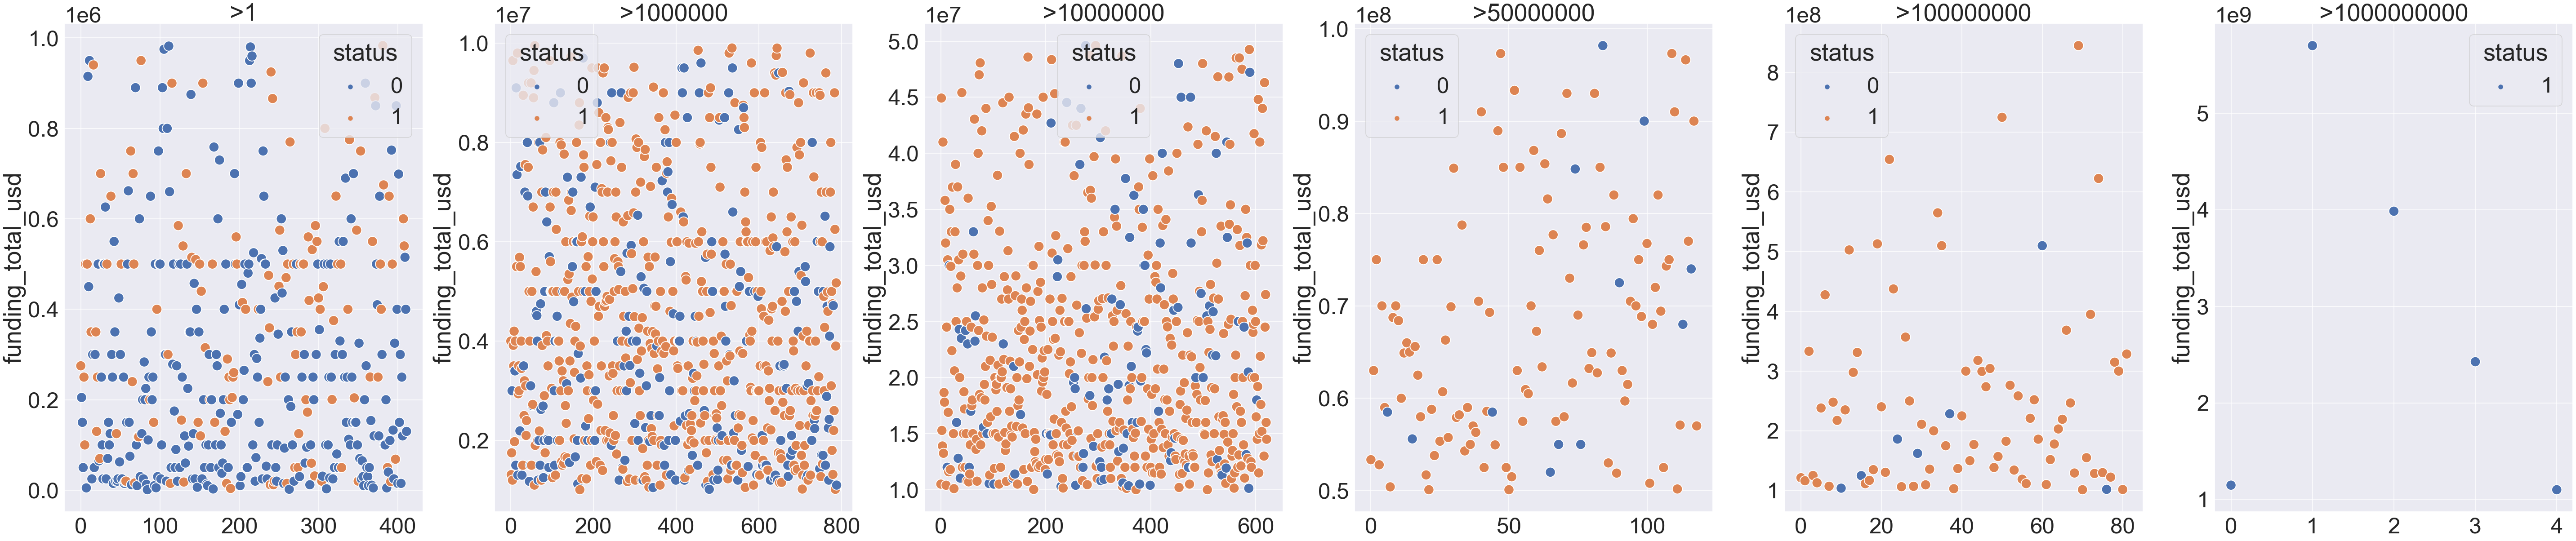

In [32]:
plt.figure(figsize=(100,20))
n = [1, 1000000, 10000000, 50000000, 100000000, 1000000000]
for i in range(len(n)):
    if i !=len(n)-1:
        selection = df[(df['funding_total_usd']<n[i+1]) & (df['funding_total_usd']>n[i])]
    else:
        selection = df[df['funding_total_usd']>n[-1]]
    ax = plt.subplot(1, len(n), i+1)
    ax.set_title(">"+str(n[i]))
    sns.scatterplot(data=selection, x=range(len(selection)), y="funding_total_usd", hue='status', ax=ax, s=500)

- Les 6 graphes décrit clairement la distribution des valeurs de la variable explicative funding_total_usd, les points en bleu sont les startup qui sont échoués et en orange sont celles qui ont vécu une réussite. 
- Dans le 1er graph, il est clair que la majorité des startups ayant des fonds totales entre 1 et 1 million de dollars ont vécu un échec.
- Dans le 2éme et le 3ème graph, il est clair que la majorité des startups ayant des fonds totales entre 1 million et 10 millions de dollars ont vécu une réussite, et ce, avec une densité plus significative de la couleur bleu dans le 2éme graph. 
- Dans le 4ème et le 5ème graph, les nombres d'individus est faible comparant aux autres graphe mais la majorité écrasante des startups ayant des fonds totale entre 50 millions et 100 millions de dollars ont vécu une réussite.
- Dans le dernier graph, il y en a que 4 individu, sur ce, on néglige l'anomalie.
<hr>*Le regroupement serait alors:*
- c0 : 0
- c1 : de 1 à 1 million
- c2 : de 1 million à 10 millions
- c3 : de 10 millions à 100 millions
- c4 : plus de 100 millions

<AxesSubplot:>

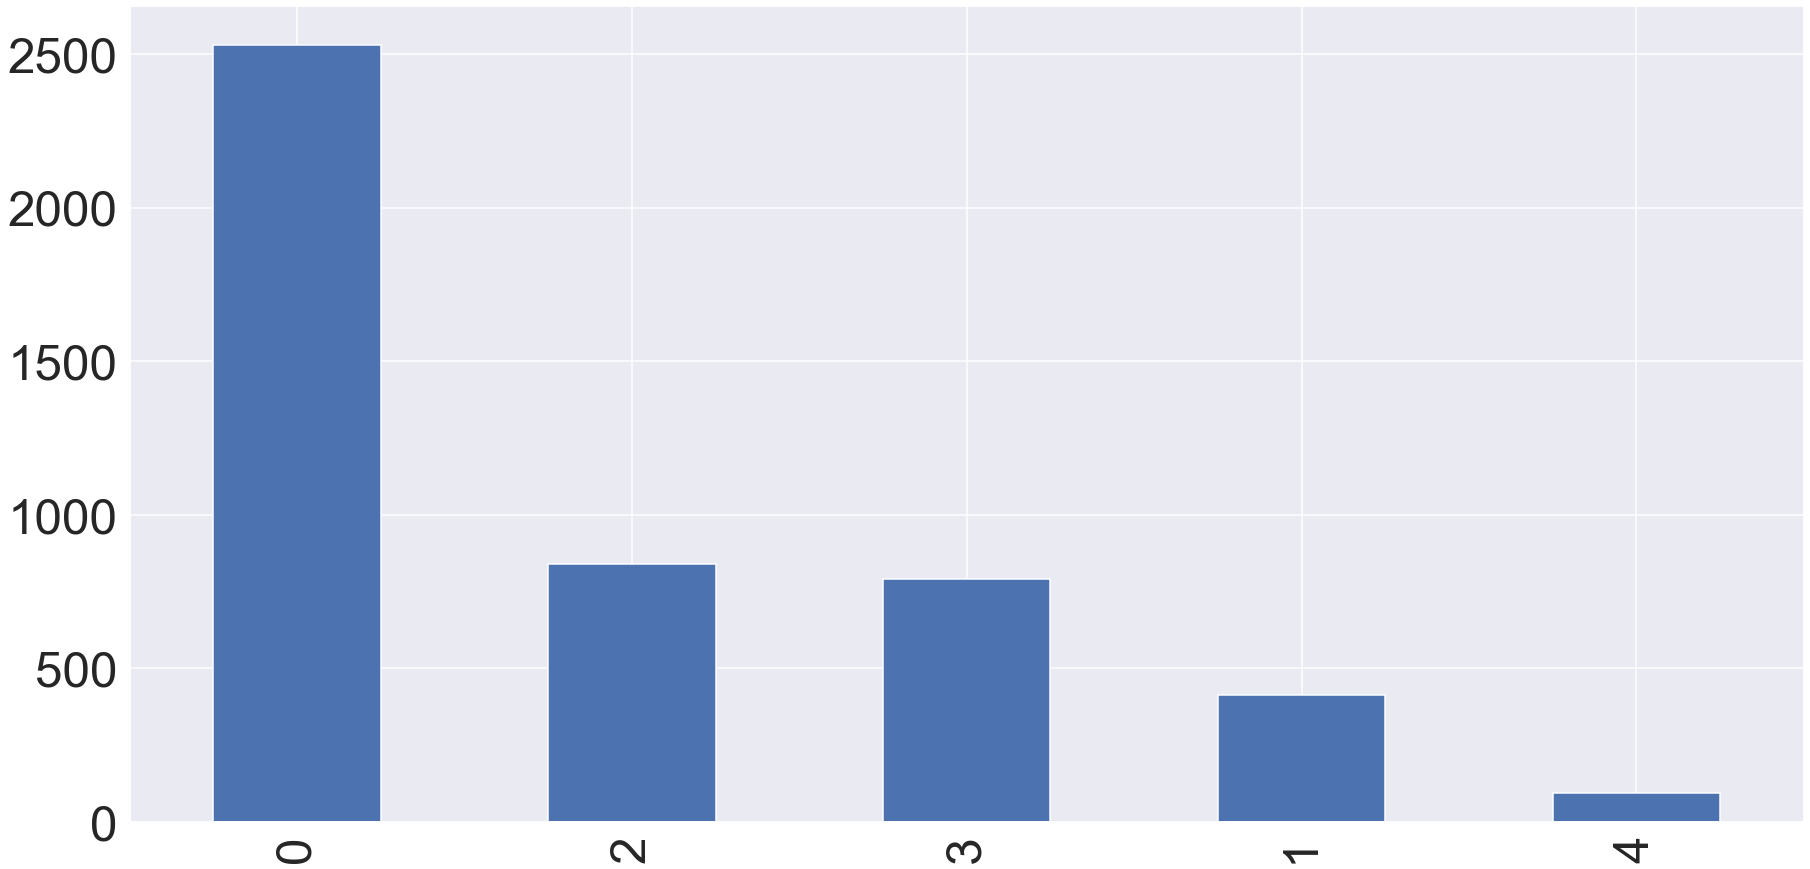

In [33]:
df['c0'] = df['funding_total_usd']<1
df['c0'].replace({False:1, True:0}, inplace=True)
df['c1'] = df['funding_total_usd']<1000000
df['c1'].replace({False:1, True:0}, inplace=True)
df['c2'] = df['funding_total_usd']<10000000
df['c2'].replace({False:1, True:0}, inplace=True)
df['c3'] = df['funding_total_usd']<100000000
df['c3'].replace({False:1, True:0}, inplace=True)
df['c4'] = df['funding_total_usd']<1000000000000
df['c4'].replace({False:1, True:0}, inplace=True)

df['funding_total_usd_class'] = df['c0']+df['c1']+df['c2']+df['c3']+df['c4']
df['funding_total_usd_class'].value_counts().plot(kind='bar', figsize=(30,15))

In [34]:
print("On rejette H5.") if df["status"].corr(df['funding_total_usd_class'], method='spearman')>=df["status"].corr(df['funding_total_usd_class'], method='spearman') else print('On accepte H5.')

On rejette H5.


# Modélisation

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df[['category_code', 'state_code', 'funding_total_usd_class', 'rel_log', 'milestones', 'invested_companies_log']], df['status'], test_size=0.3, random_state=100)

In [37]:
modele_regLog = linear_model.LogisticRegression(random_state = 0, solver = 'liblinear', multi_class = 'auto')
modele_regLog.fit(X_train,y_train)
precision = modele_regLog.score(X_test,y_test)
print(precision*100)

78.14285714285715


In [38]:
N, k = 0, []
for n in range(5, 200,5):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    k.append(knn.score(X_test, y_test))
    if knn.score(X_test, y_test)==max(k):
        N=n
print(max(k)*100, N)

78.85714285714286 20


In [39]:
l,s=[],[]
for minsleaf in range(10,500,10):
    for maxDepth in range(5,50):
        clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=10, max_depth=maxDepth, min_samples_leaf=minsleaf)
        clf_entropy.fit(X_train, y_train)
        y_pred_en = clf_entropy.predict(X_test)
        l.append(accuracy_score(y_test, y_pred_en)*100)
        if max(l)==accuracy_score(y_test, y_pred_en)*100:
            s=[minsleaf,maxDepth]
print(max(l), s)

82.28571428571428 [80, 6]


In [40]:
clf = RandomForestClassifier(max_depth=100, random_state=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7957142857142857

# Conclusion

<h4>Ayant une précision de 82,29%, L'arbre décisionnelle est la meilleure solution pour cette problématique.</h4>